Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
num_days_R_prediction=14

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=8 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=51
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
#
drop_n_dataset_days=45
#

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN           United States  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
238                           NaN                Thailand  15.870032   
239                           NaN             Timor-Leste  -8.874217   
240                           NaN                    Togo   8.619500   
241                           NaN     Trinidad and Tobago  10.691800   
242                           NaN                 Tunisia  33.886917   
243                           NaN                  Turkey  38.963700   
244                           NaN           United States  40.000000   
245                           NaN                  Uganda   1.373333   
246                           NaN                 Ukraine  48.379400   
247                           NaN    United Arab Emirates  23.424076   
248                      Anguilla          United Kingdom  18.220600   
249                       Bermuda          United Kingdom  32.307800   
250        British Virgin Islands          United Kingdom  18.420700   
251                Cayman Islands          United Kingdom  19.313300   
252               Channel Islands          United Kingdom  49.372300   
253   Falkland Islands (Malvinas)          United Kingdom -51.796300   
254                     Gibraltar          United Kingdom  36.140800   
255                   Isle of Man          United Kingdom  54.236100   
256                    Montserrat          United Kingdom  16.742498   
257      Turks and Caicos Islands          United Kingdom  21.694000   
258                           NaN          United Kingdom  55.378100   
259                           NaN                 Uruguay -32.522800   
260                           NaN              Uzbekistan  41.377491   
261                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/30/20  \
185        0        0        0        0        0        0  ...       61   
186        0        0        0        0        0        0  ...      121   
187        0        0        0        0        0        0  ...      498   
188        0        0        0        0        0        0  ...       27   
189        0        0        0        0        0        0  ...        1   
190        0        0        0        0        0        0  ...        1   
191        0        0        0        0        0        0  ...       22   
192        0        0        0        0        0        0  ...     6406   
193        0        0        0        0        0        0  ...       25   
194        0        0        0        0        0        0  ...      151   

     10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  10/7/20  \
185       62       64       64       66       66       67       68   
186      123      123      123      123      125      125      126   
187      509      520      528      535      554      563      578   
188       27       30       30       30       31       31       31   
189        1        1        1        1        1        2        2   
190        1        1        1        1        1        1        1   
191       22       22       22       22       22       22       22   
192     6419     6428     6449     6454     6454     6482     6518   
193       25       25       25       25       25       25       25   
194      151      151      151      151      151      151      153   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 266 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/30/20  \
175        0        0        0        0        0        0  ...     3259   
176        0        0        0        0        0        0  ...       32   
177        0        0        0        0        0        0  ...      171   
178        0        0        0        0        0        0  ...      557   
179        0        0        0        0        0        0  ...        0   
180        0        0        0        0        0        0  ...     1770   
181        0        0        0        0        0        0  ...     2913   
182        0        0        0        0        0        0  ...     1114   
183        0        0        0        0        0        0  ...    50358   
184        0        0        0        0        0        0  ...    14959   

     10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  10/7/20  \
175     3327     3406     3474     3532     3612     3643     3678   
176       32       32       46       46       46       67       67   
177      185      197      213      231      242      262      270   
178      567      572      572      572      592      592      592   
179        0        0        0        0        0        0        0   
180     1780     1783     1788     1790     1790     1799     1800   
181     2913     2913     2913     2913     2913     4225     4225   
182     1114     1115     1115     1115     1115     1115     1122   
183    50452    50593    50718    50768    50951    51308    51403   
184    15068    15164    15264    15341    15487    15645    15749   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 266 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/30/20  \
185        0        0        0        0        0        0  ...     8728   
186        0        0        0        0        0        0  ...    11265   
187        0        0        0        1        1        1  ...    77817   
188        0        0        0        0        0        0  ...     3963   
189        0        0        0        0        0        0  ...      121   
190        0        0        0        0        0        0  ...      392   
191        0        0        0        0        0        0  ...      667   
192        0        0        0        0        0        0  ...   120845   
193        0        0        0        0        0        0  ...     1848   
194        0        0        0        0        0        0  ...     5170   

     10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  10/7/20  \
185     8888     8979     9049     9196     9296     9398     9494   
186    11373    11480    11572    11626    11654    11673    11714   
187    79728    82450    84570    86823    89263    90814    94253   
188     3998     4038     4074     4079     4094     4108     4133   
189      121      121      124      124      124      141      141   
190      399      411      429      452      462      476      505   
191      668      674      678      679      686      689      698   
192   124097   127922   131889   135892   135892   144999   149988   
193     1848     1849     1854     1855     1858     1861     1864   
194     5170     5170     5170     5170     5170     5264     5264   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 266 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN     Seychelles  -4.679600   55.492000        0        0   
221            NaN   Sierra Leone   8.460555  -11.779889        0        0   
222            NaN      Singapore   1.283300  103.833300        0        1   
223            NaN       Slovakia  48.669000   19.699000        0        0   
224            NaN       Slovenia  46.151200   14.995500        0        0   
225            NaN        Somalia   5.152149   46.199616        0        0   
226            NaN   South Africa -30.559500   22.937500        0        0   
227            NaN    South Sudan   6.877000   31.307000        0        0   
228            NaN          Spain  40.463667   -3.749220        0        0   
229            NaN      Sri Lanka   7.873054   80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  9/30/20  10/1/20  10/2/20  \
220        0        0        0        0  ...      144      144      145   
221        0        0        0        0  ...     2231     2238     2252   
222        3        3        4        5  ...    57765    57784    57794   
223        0        0        0        0  ...    10141    10938    11617   
224        0        0        0        0  ...     5690     5865     6103   
225        0        0        0        0  ...     3588     3593     3593   
226        0        0        0        0  ...   674339   676084   677833   
227        0        0        0        0  ...     2704     2704     2715   
228        0        0        0        0  ...   769188   778607   789932   
229        0        0        0        1  ...     3380     3382     3388   

     10/3/20  10/4/20  10/5/20  10/6/20  10/7/20   Population   \
220      146      146      146      148      148           NaN   
221     2259     2269     2269     2277     2287           NaN   
222    57800    57812    57819    57830    57840     5,612,000   
223    12321    13139    13492    13812    14689     5,459,087   
224     6330     6498     6673     6764     7120     2,078,878   
225     3593     3745     3745     3745     3745           NaN   
226   679716   681289   682215   683242   685155    59,148,674   
227     2715     2726     2726     2734     2748           NaN   
228   789932   789932   813412   825410   835901    46,660,000   
229     3395     3402     3513     4252     4459    21,440,000   

               region  
220    Seychelles_nan  
221  Sierra Leone_nan  
222     Singapore_nan  
223      Slovakia_nan  
224      Slovenia_nan  
225       Somalia_nan  
226  South Africa_nan  
227   South Sudan_nan  
228         Spain_nan  
229     Sri Lanka_nan  

[10 rows x 266 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

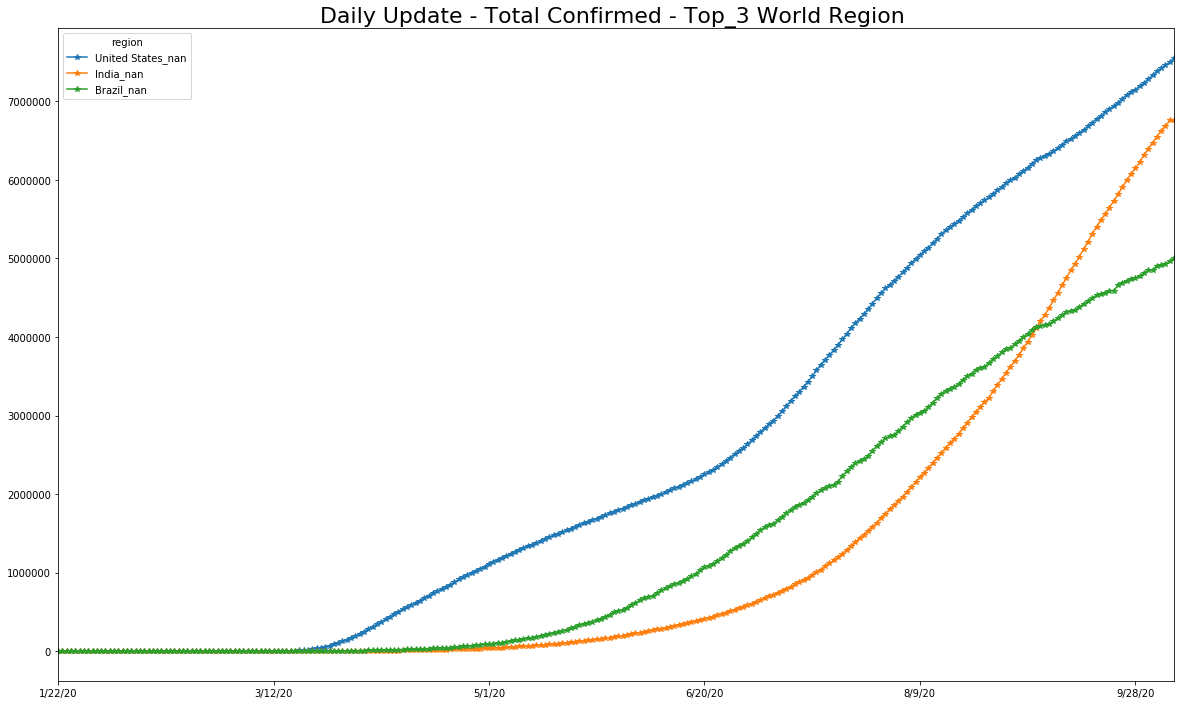

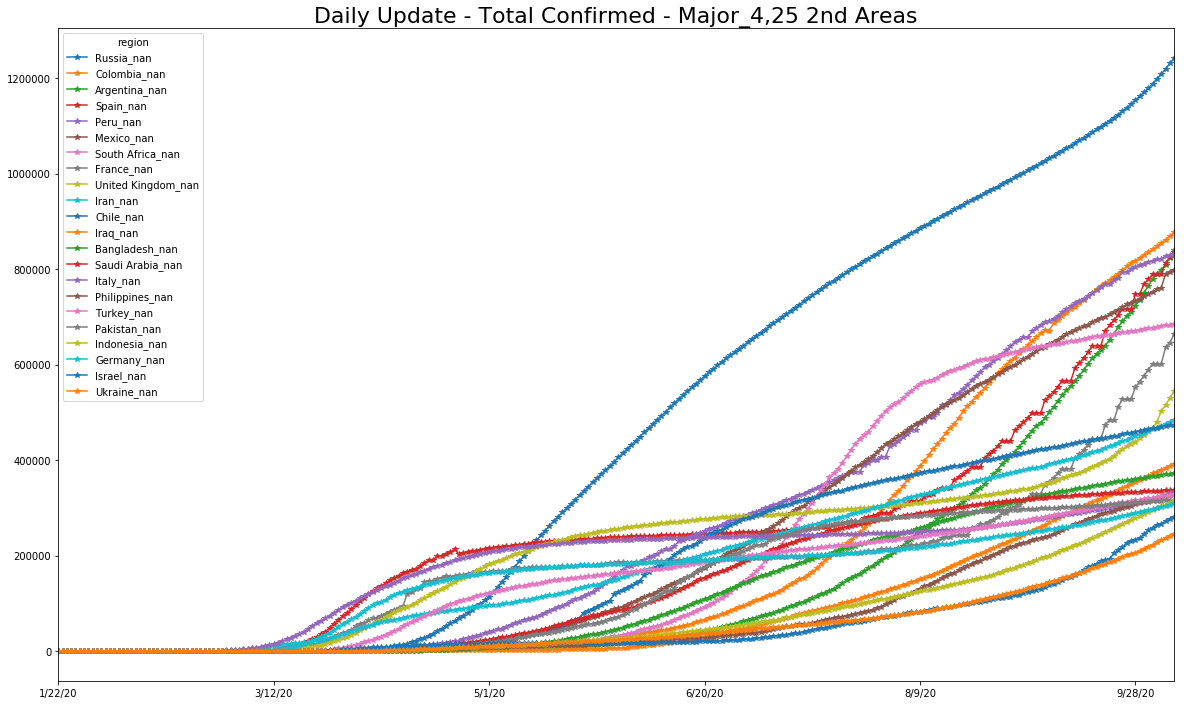

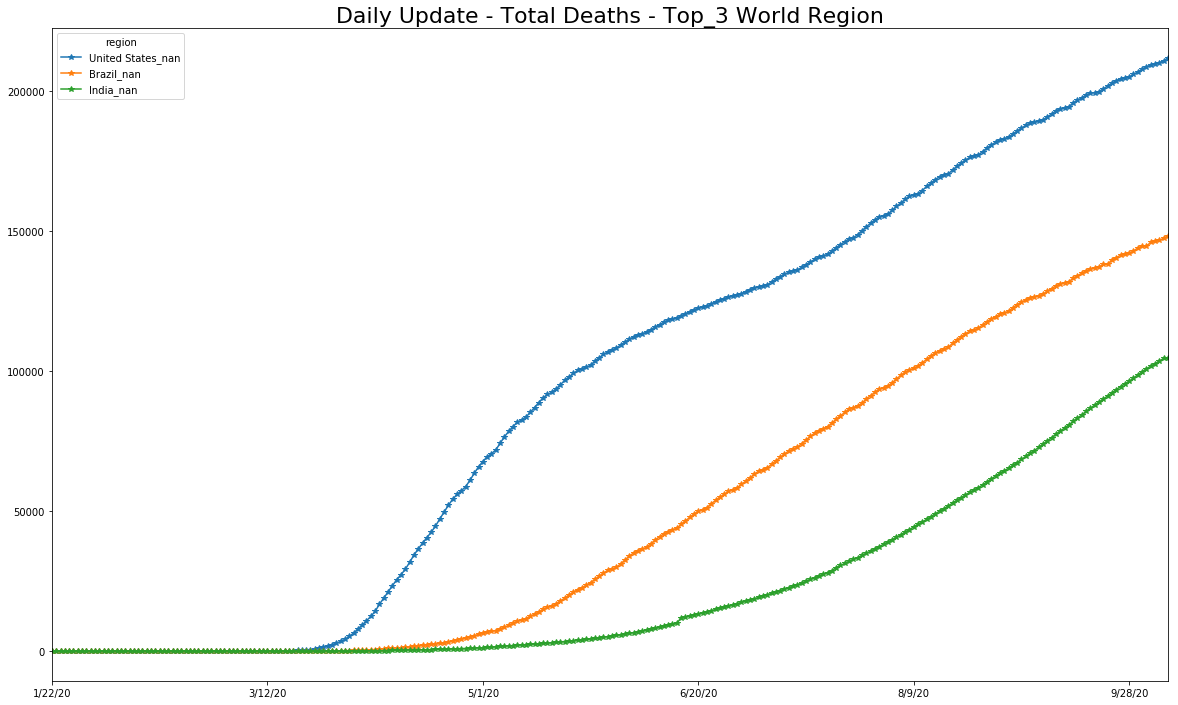

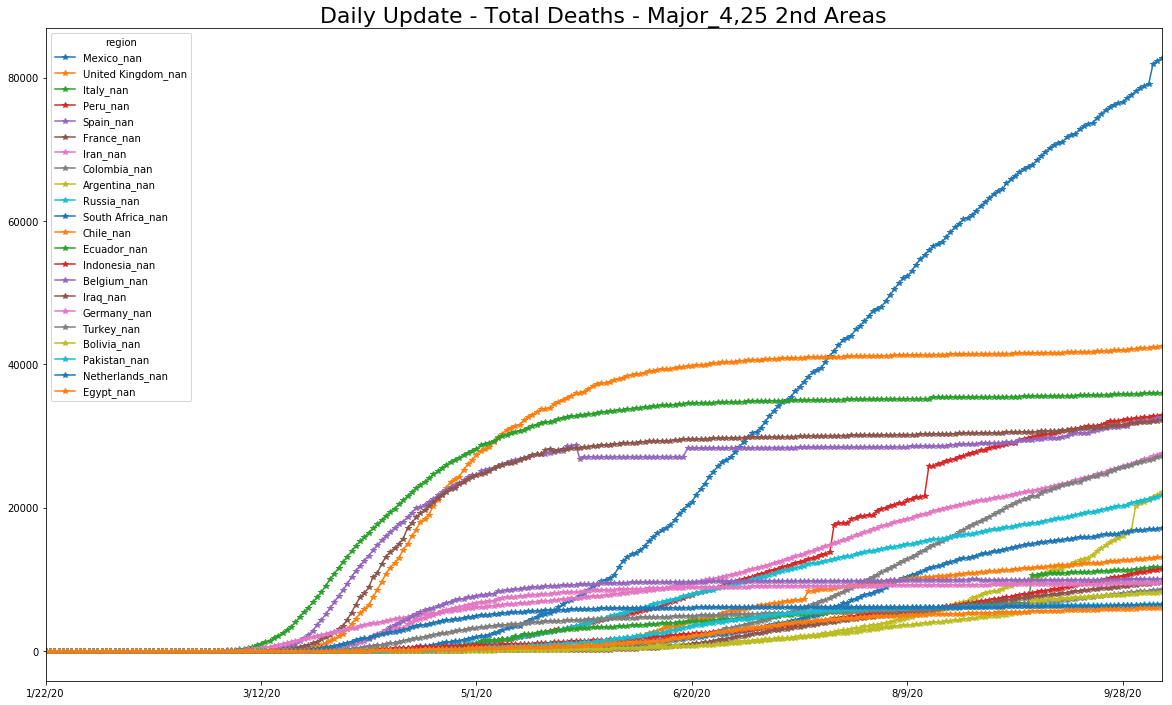

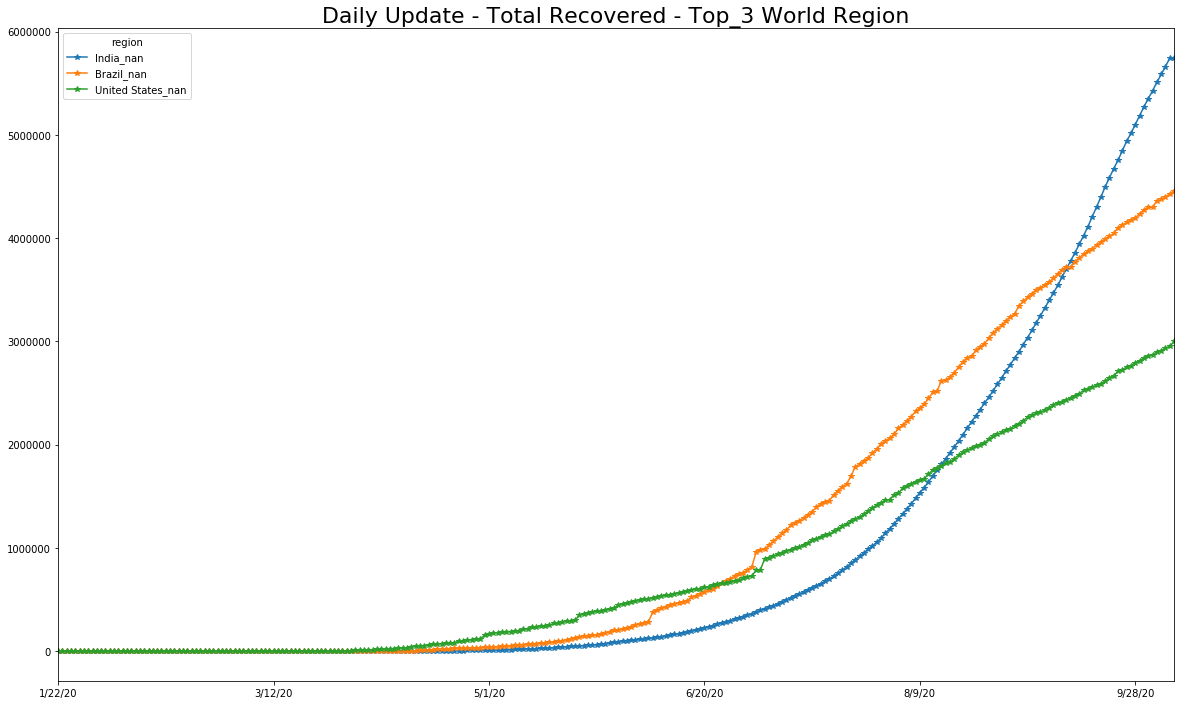

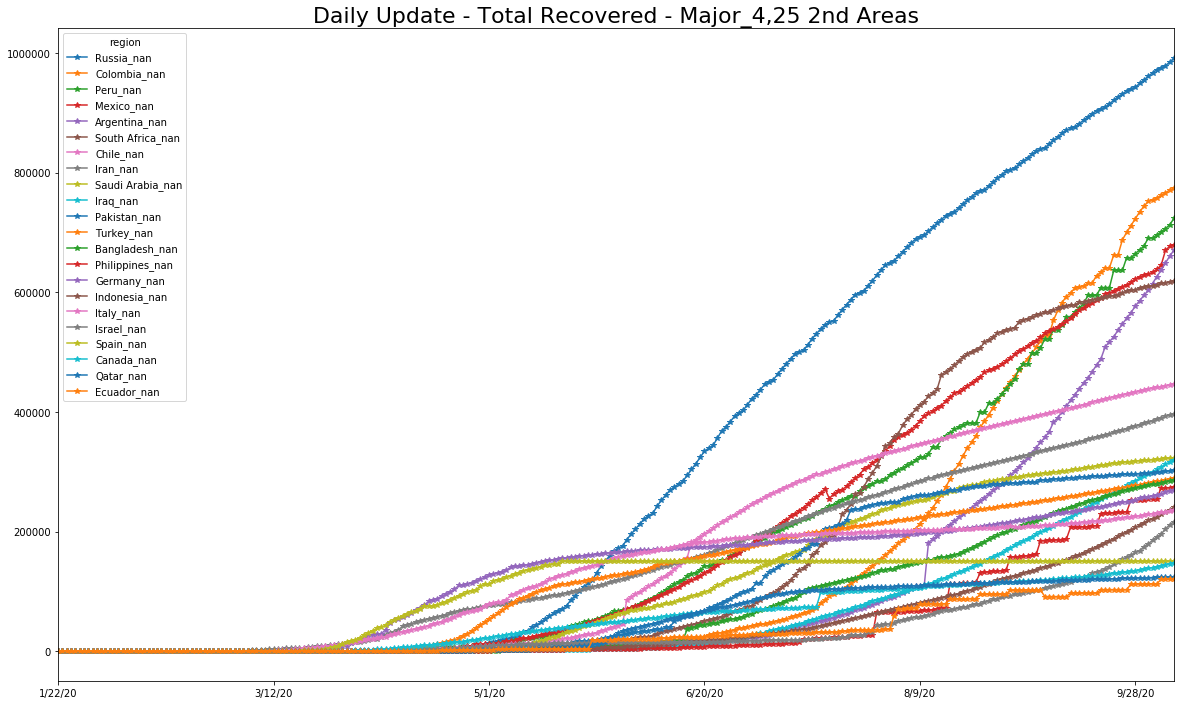

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/10/08


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
## DROP_N=15
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
3/7/20                1            0           17            1           0   
3/8/20                4            0           19            1           0   
3/9/20                4            2           20            1           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
3/7/20                        0              8            1   
3/8/20                        0             12            1   
3/9/20                        0             12            1   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
3/7/20                                       0                         28   
3/8/20                                       0                         38   
3/9/20                                       0                         48   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
3/7/20  ...                403            0               0              0   
3/8/20  ...                519            0               0              0   
3/9/20  ...                594            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
3/7/20           18                      16                   0          0   
3/8/20           30                      16                   0          0   
3/9/20           30                      19                   0          0   

region  Zambia_nan  Zimbabwe_nan  
3/7/20           0             0  
3/8/20           0             0  
3/9/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/4/20            39341        14266        52136         2110        5402   
10/5/20            39422        14410        52270         2370        5530   
10/6/20            39486        14568        52399         2370        5725   
10/7/20            39548        14730        52520         2568        5725   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/4/20                      107         798486        52496   
10/5/20                      107         809728        52677   
10/6/20                      107         824468        53083   
10/7/20                      108         840915        53755   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
10/4/20                                     113                       4235   
10/5/20                                     113                       4246   
10/6/20                                     113                       4249   
10/7/20                                     113                       4261   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
10/4/20  ...            7417845         2145           58612          78434   
10/5/20  ...            7457402         2155           58946          79117   
10/6/20  ...            7499341         2177           59343          79796   
10/7/20  ...            7549682         2206           59579          80404   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
10/4/20         1096                   41498                  10       2041   
10/5/20         1097                   41957                  10       2041   
10/6/20         1098                   42432                  10       2047   
10/7/20         1099                   42840                  10       2049   

region   Zambia_nan  Zimbabwe_nan  
10/4/20       15052          7888  
10/5/20       15089          7898  
10/6/20       15170          7915  
10/7/20       15224          7919  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-03-08  Afghanistan_nan          4             0             0   
2     2020-03-09  Afghanistan_nan          4             3             0   
3     2020-03-10  Afghanistan_nan          5             0             0   
4     2020-03-11  Afghanistan_nan          7             1             4   
5     2020-03-12  Afghanistan_nan          7             2             3   
6     2020-03-13  Afghanistan_nan          7             0             3   
7     2020-03-14  Afghanistan_nan         11             0             2   
8     2020-03-15  Afghanistan_nan         16             4             4   
9     2020-03-16  Afghanistan_nan         21             5             9   
10    2020-03-17  Afghanistan_nan         22             5            14   
11    2020-03-18  Afghanistan_nan         22             1            11   
12    2020-03-19  Afghanistan_nan         22             0             6   
13    2020-03-20  Afghanistan_nan         24             0             1   
14    2020-03-21  Afghanistan_nan         24             2             2   
15    2020-03-22  Afghanistan_nan         40             0             2   
16    2020-03-23  Afghanistan_nan         40            16            18   
17    2020-03-24  Afghanistan_nan         74             0            16   
18    2020-03-25  Afghanistan_nan         84            34            50   
19    2020-03-26  Afghanistan_nan         94            10            44   
20    2020-03-27  Afghanistan_nan        110            10            54   
21    2020-03-28  Afghanistan_nan        110            16            36   
22    2020-03-29  Afghanistan_nan        120             0            26   
23    2020-03-30  Afghanistan_nan        170            10            26   
24    2020-03-31  Afghanistan_nan        174            50            60   
25    2020-04-01  Afghanistan_nan        237             4            64   
26    2020-04-02  Afghanistan_nan        273            63           117   
27    2020-04-03  Afghanistan_nan        281            36           103   
28    2020-04-04  Afghanistan_nan        299             8           107   
29    2020-04-05  Afghanistan_nan        349            18            62   
30    2020-04-06  Afghanistan_nan        367            50            76   
...          ...              ...        ...           ...           ...   
57858 2020-09-09     Zimbabwe_nan       7429            90           551   
57859 2020-09-10     Zimbabwe_nan       7453            41           592   
57860 2020-09-11     Zimbabwe_nan       7479            24           155   
57861 2020-09-12     Zimbabwe_nan       7508            26            91   
57862 2020-09-13     Zimbabwe_nan       7526            29            79   
57863 2020-09-14     Zimbabwe_nan       7531            18            73   
57864 2020-09-15     Zimbabwe_nan       7576             5            52   
57865 2020-09-16     Zimbabwe_nan       7598            45            68   
57866 2020-09-17     Zimbabwe_nan       7633            22            72   
57867 2020-09-18     Zimbabwe_nan       7647            35           102   
57868 2020-09-19     Zimbabwe_nan       7672            14            71   
57869 2020-09-20     Zimbabwe_nan       7683            25            74   
57870 2020-09-21     Zimbabwe_nan       7683            11            50   
57871 2020-09-22     Zimbabwe_nan       7711             0            36   
57872 2020-09-23     Zimbabwe_nan       7725            28            39   
57873 2020-09-24     Zimbabwe_nan       7752            14            42   
57874 2020-09-25     Zimbabwe_nan       7787            27            69   
57875 2020-09-26     Zimbabwe_nan       7803            35            76   
57876 2020-09-27     Zimbabwe_nan       7812            16            78   
57877 2020-09-28     Zimbabwe_nan       7816             9            60   
57878 2020-09-29     Zimbabwe_nan       7837             4  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
57887 2020-10-08  Zimbabwe_nan          0             4            31   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
57887            81         100.050663         100.393129         101.033554   

       last_day  kalman_prediction  population  infected_rate  min  max  
57887      7919             7933.0    14862924       0.000005  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
57885  2020-10-06  Zimbabwe_nan       7915            10            40   
57886  2020-10-07  Zimbabwe_nan       7919            17            30   
57887  2020-10-08  Zimbabwe_nan          0             4            31   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
57885            82         100.126902         100.509163         101.049258   
57886            78         100.215371         100.380596         100.995406   
57887            81         100.050663         100.393129         101.033554   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
57885                 7898  ...    14862924       0.000005  NaN  NaN   
57886                 7915  ...    14862924       0.000005  NaN  NaN   
57887                 7919  ...    14862924       0.000005  NaN  NaN   

       population_percentage : infected_rate confirmed  \
57885                                         0.000531   
57886                                         0.000533   
57887                                         0.000533   

       population_percentage : factor 9/10 infected_rate confirmed  \
57885                                           0.005315             
57886                                           0.005326             
57887                                           0.005329             

       delta : new_cases  delta : new_cases per 1M hab  \
57885               13.0                      0.874660   
57886                9.0                      0.605534   
57887               14.0                      0.941941   

       delta : roling 7day AVG  \
57885                11.714286   
57886                11.142857   
57887                11.571429   

       delta : aprox 14-day case notification rate per 100k hab  
57885                                           1.103417         
57886                                           1.049592         
57887                                           1.089960         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
256  United States_nan  2.681105e+11  517793.89958  41913.944186


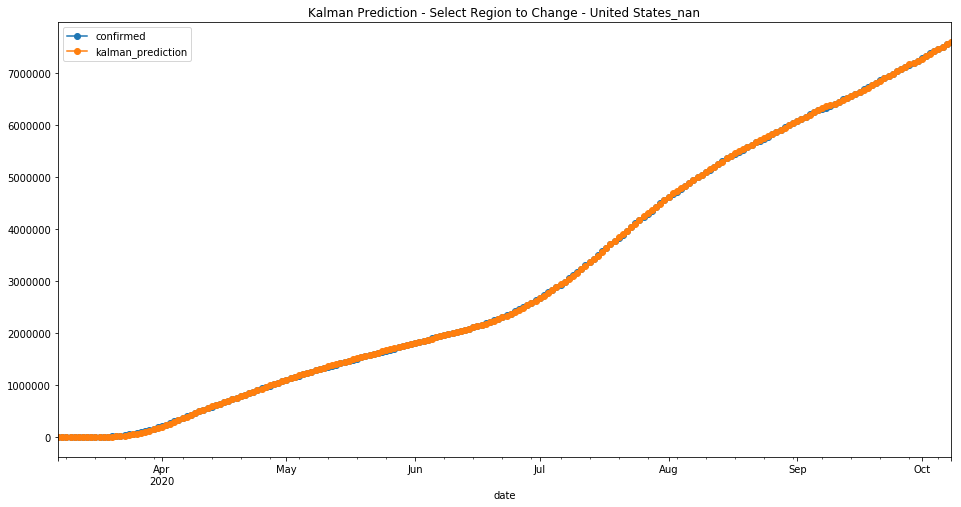

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  7.285895e+09  85357.456542  6582.502326


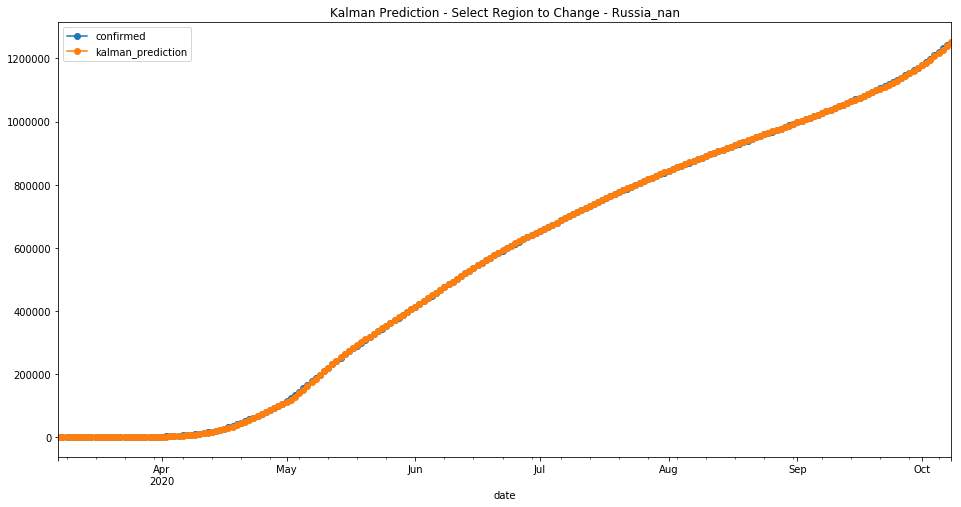

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  1.175078e+11  342794.169794  32808.637209


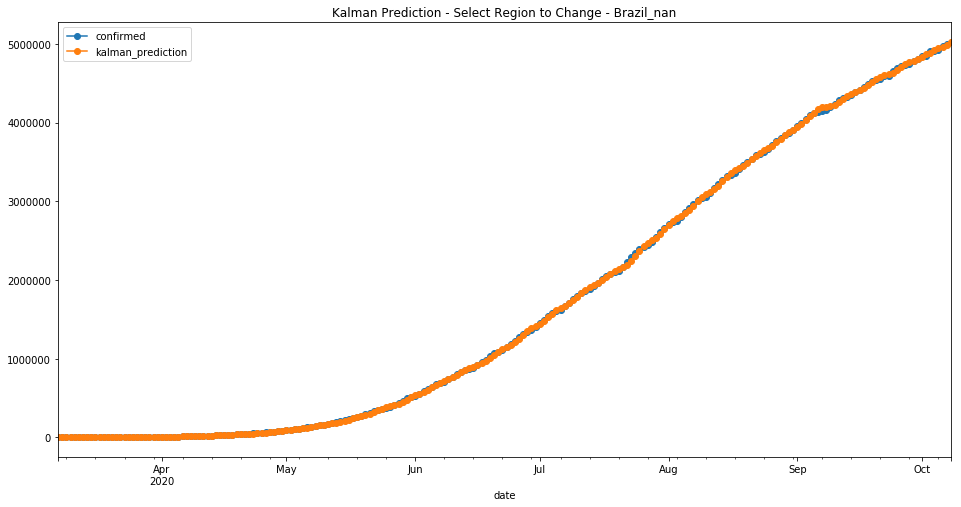

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse         mae
255  United Kingdom_nan  1.440718e+09  37956.792412  3468.55814


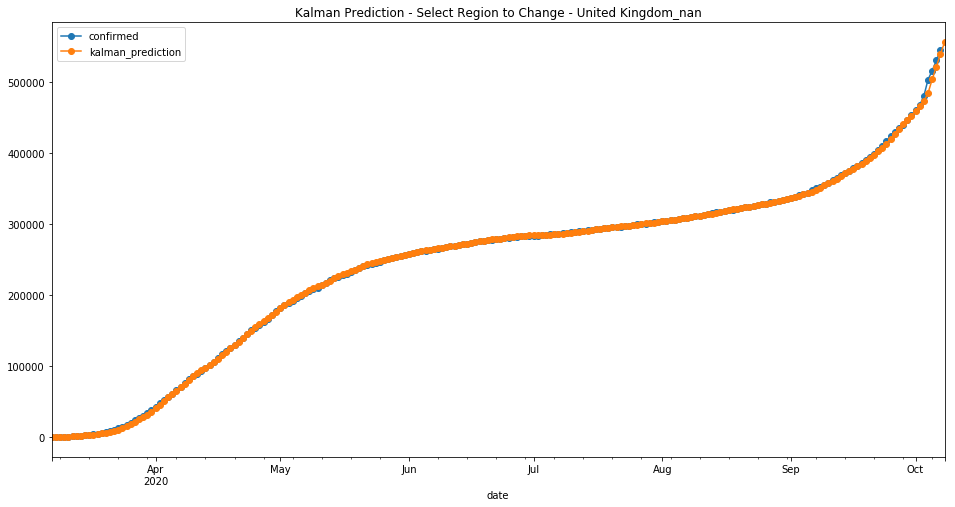

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi402a8dy
  JVM stdout: /tmp/tmpi402a8dy/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi402a8dy/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    9 days
H2O_cluster_name:           H2O_from_python_unknownUser_gx38ci
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-09-30
last_train_date= 2020-10-07
first_bootstrap_date= 2020-09-29
boost_bootstrap_date= 2020-10-04
first_test_date= 2020-09-28
last_test_date= 2020-10-08
first_valid_date= 2020-10-06


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   39278.0      39254 2020-09-29  Afghanistan_nan
1   39299.0      39268 2020-09-30  Afghanistan_nan
2   39308.0      39285 2020-10-01  Afghanistan_nan
3   39323.0      39290 2020-10-02  Afghanistan_nan
4   39325.0      39297 2020-10-03  Afghanistan_nan
5   39333.0      39341 2020-10-04  Afghanistan_nan
6   39382.0      39422 2020-10-05  Afghanistan_nan
7   39472.0      39486 2020-10-06  Afghanistan_nan
8   39533.0      39548 2020-10-07  Afghanistan_nan
9   39602.0          0 2020-10-08  Afghanistan_nan
10  13542.0      13518 2020-09-29      Albania_nan
11  13663.0      13649 2020-09-30      Albania_nan
12  13793.0      13806 2020-10-01      Albania_nan
13  13956.0      13965 2020-10-02      Albania_nan
14  14117.0      14117 2020-10-03      Albania_nan
15  14273.0      14266 2020-10-04      Albania_nan
16  14430.0      14410 2020-10-05      Albania_nan
17  14578.0      14568 2020-10-06      Albania_nan
18  14743.0      14730 2020-10-07      Albania_nan
19  14909.0          0 2020-10-08      Albania_nan
20  51426.0      51368 2020-09-29      Algeria_nan
21  51576.0      51530 2020-09-30      Algeria_nan
22  51733.0      51690 2020-10-01      Algeria_nan
23  51887.0      51847 2020-10-02      Algeria_nan
24  52041.0      51995 2020-10-03      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  40648.0      40691 2020-10-04  Azerbaijan_nan
176  40780.0      40788 2020-10-05  Azerbaijan_nan
177  40884.0      40931 2020-10-06  Azerbaijan_nan
178  41045.0      41113 2020-10-07  Azerbaijan_nan
179  41239.0          0 2020-10-08  Azerbaijan_nan
180   3920.0       3903 2020-09-29     Bahamas_nan
181   3989.0       4123 2020-09-30     Bahamas_nan
182   4225.0       4123 2020-10-01     Bahamas_nan
183   4172.0       4220 2020-10-02     Bahamas_nan
184   4291.0       4332 2020-10-03     Bahamas_nan
185   4431.0       4409 2020-10-04     Bahamas_nan
186   4499.0       4452 2020-10-05     Bahamas_nan
187   4548.0       4559 2020-10-06     Bahamas_nan
188   4674.0       4713 2020-10-07     Bahamas_nan
189   4820.0          0 2020-10-08     Bahamas_nan
190  70612.0      70422 2020-09-29     Bahrain_nan
191  71192.0      70864 2020-09-30     Bahrain_nan
192  71595.0      71374 2020-10-01     Bahrain_nan
193  72092.0      71803 2020-10-02     Bahrain_nan
194  72505.0      72310 2020-10-03     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220   78222.0      78260 2020-09-29  Belarus_nan
221   78552.0      78631 2020-09-30  Belarus_nan
222   78948.0      79019 2020-10-01  Belarus_nan
223   79348.0      79421 2020-10-02  Belarus_nan
224   79760.0      79852 2020-10-03  Belarus_nan
225   80207.0      79852 2020-10-04  Belarus_nan
226   80127.0      80696 2020-10-05  Belarus_nan
227   81161.0      81090 2020-10-06  Belarus_nan
228   81464.0      81505 2020-10-07  Belarus_nan
229   81864.0          0 2020-10-08  Belarus_nan
230  117145.0     117115 2020-09-29  Belgium_nan
231  119013.0     118452 2020-09-30  Belgium_nan
232  120197.0     121059 2020-10-01  Belgium_nan
233  122986.0     124234 2020-10-02  Belgium_nan
234  126228.0     127623 2020-10-03  Belgium_nan
235  129679.0     130235 2020-10-04  Belgium_nan
236  132372.0     132203 2020-10-05  Belgium_nan
237  134537.0     134291 2020-10-06  Belgium_nan
238  136887.0     137868 2020-10-07  Belgium_nan
239  140943.0          0 2020-10-08  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  52966849.09488432
# MSE on the validation data =  1123118201217.1362
# R^2 on the training data =  0.9999380107157655
# R^2 on the validation data =  0.47500828902266623


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602145737077_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           28123922.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       23.0       23.0        23.0      4101.0      4602.0     4387.504



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 52966849.09488432
RMSE: 7277.832719627755
MAE: 1367.7568788788878
RMSLE: 0.24956035190274464
Mean Residual Deviance: 52966849.09488432

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1123118201217.1362
RMSE: 1059772.7120553427
MAE: 247071.1514879689
RMSLE: 6.743586073019471
Mean Residual Deviance: 1123118201217.1362

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-10-08 08:29:05   0.085 sec              0.0            NaN   
1     2020-10-08 08:29:05   0.497 sec              1.0   24219.995102   
2     2020-10-08 08:29:06   0.658 sec              2.0   27954.811110   
3     2020-10-08 08:29:06   0.877 sec              3.0   24450.348062   
4     2020-10-08 08:29:06   0.949 sec              4.0   22910.574955   
5     2020-10-08 08:29:06   1.023 sec              5.0   20023.026570   
6     2020-10-08 08:29:06   1.088 sec              6.0   23786.015191   
7     2020-10-08 08:29:06   1.154 sec              7.0   24723.887966   
8     2020-10-08 08:29:06   1.204 sec              8.0   26811.292831   
9     2020-10-08 08:29:06   1.266 sec              9.0   23371.039474   
10    2020-10-08 08:29:06   1.328 sec             10.0   21826.375281   
11    2020-10-08 08:29:06   1.470 sec             11.0   20419.782323   
12    2020-10-08 08:29:06   1.562 sec             12.0   19753.082346   
13    2020-10-08 08:29:07   1.608 sec             13.0   18717.717318   
14    2020-10-08 08:29:07   1.654 sec             14.0   20764.520172   
15    2020-10-08 08:29:07   1.712 sec             15.0   19570.201986   
16    2020-10-08 08:29:07   1.770 sec             16.0   18707.098290   
17    2020-10-08 08:29:07   1.832 sec             17.0   18341.400960   
18    2020-10-08 08:29:07   1.898 sec             18.0   17839.177374   
19    2020-10-08 08:29:07   2.007 sec             19.0   17482.684597   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1    5508.075921       5.866082e+08     9.659717e+05   227314.193056   
2    5651.366114       7.814715e+08     1.018752e+06   237538.990790   
3    4990.491996       5.978195e+08     9.934071e+05   241568.156190   
4    4587.252364       5.248944e+08     1.013913e+06   243612.452404   
5    4160.382155       4.009216e+08     1.022691e+06   243988.391168   
6    4209.773793       5.657745e+08     1.027520e+06   243784.959712   
7    4217.245845       6.112706e+08     1.021049e+06   242480.346704   
8    4125.966389       7.188454e+08     1.028395e+06   243212.019318   
9    4019.377768       5.462055e+08     1.034945e+06   244015.895697   
10   3790.939784       4.763907e+08     1.028305e+06   242572.101452   
11   3573.683322       4.169675e+08     1.033101e+06   243139.098819   
12   3504.049016       3.901843e+08     1.037515e+06   244124.314830   
13   3318.326318       3.503529e+08     1.037800e+06   244624.176170   
14   3298.689222       4.311653e+08     1.040884e+06   244867.899429   
15   3140.171104       3.829928e+08     1.032872e+06   245156.745468   
16   3019.031214       3.499555e+08     1.034399e+06   245109.984020   
17   2981.729395       3.364070e+08     1.027949e+06   243625.042665   
18   2888.518618       3.182362e+08     1.031376e+06   243990.387554   
19   2828.918305       3.056443e+08     1.034797e+06   244494.723901   

    validation_deviance  
0                   NaN  
1          9.331013e+11  
2          1.037855e+12  
3          9.868576e+11  
4          1.028020e+12  
5          1.045897e+12  
6          1.055798e+12  
7          1.042542e+12  
8          1.057595e+12  
9          1.071110e+12  
10         1.057411e+12  
11         1.067297e+12  
12         1.076438e+12  
13         1.077029e+12  
14         1.083439e+12  
15         1.066825e+12  
16         1.069981e+12  
17         1.056679e+12  
18         1.063736e+12  
19         1.070804e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.250865e+18           1.000000    0.379257
1            last_day         9.894508e+17           0.791013    0.299997
2        7_day_change         4.728104e+17           0.377987    0.143354
3        3_day_change         2.827777e+17           0.226066    0.085737
4        1_day_change         1.505047e+17           0.120320    0.045632
5              region         5.772932e+16           0.046152    0.017503
6   3_day_change_rate         3.476479e+16           0.027793    0.010541
7       infected_rate         2.551729e+16           0.020400    0.007737
8   1_day_change_rate         1.901217e+16           0.015199    0.005764
9   7_day_change_rate         8.130198e+15           0.006500    0.002465
10                min         3.489395e+15           0.002790    0.001058
11                max         3.149996e+15           0.002518    0.000955

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.250865e+18           1.000000    0.379257
1            last_day         9.894508e+17           0.791013    0.299997
2        7_day_change         4.728104e+17           0.377987    0.143354
3        3_day_change         2.827777e+17           0.226066    0.085737
4        1_day_change         1.505047e+17           0.120320    0.045632
5              region         5.772932e+16           0.046152    0.017503
6   3_day_change_rate         3.476479e+16           0.027793    0.010541
7       infected_rate         2.551729e+16           0.020400    0.007737
8   1_day_change_rate         1.901217e+16           0.015199    0.005764
9   7_day_change_rate         8.130198e+15           0.006500    0.002465
10                min         3.489395e+15           0.002790    0.001058
11                max         3.149996e+15           0.002518    0.000955

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


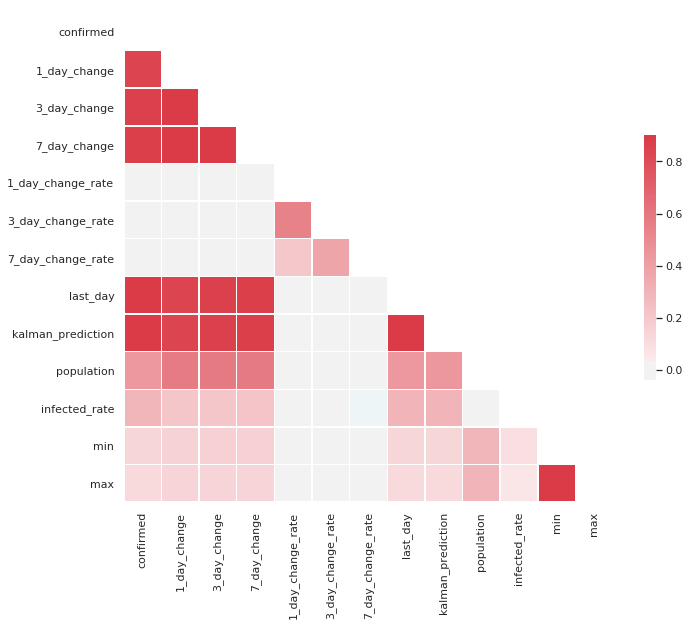

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.846596
3_day_change         0.860956
7_day_change         0.872783
1_day_change_rate    0.006942
3_day_change_rate   -0.008750
7_day_change_rate   -0.013635
last_day             0.988887
kalman_prediction    0.988952
population           0.441027
infected_rate        0.295611
min                  0.140895
max                  0.119956
Name: confirmed, dtype: float64


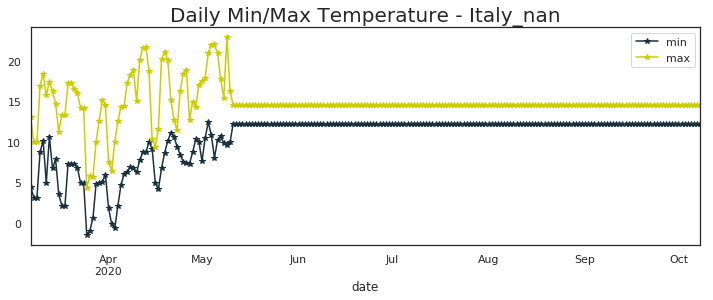

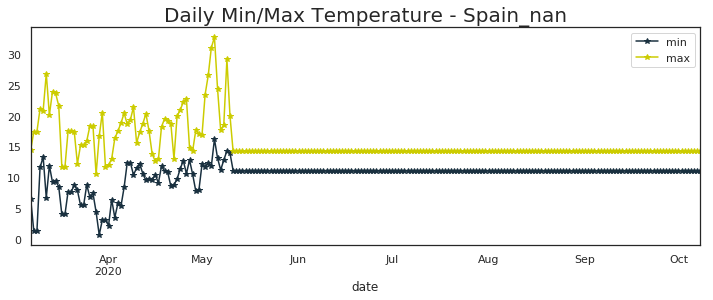

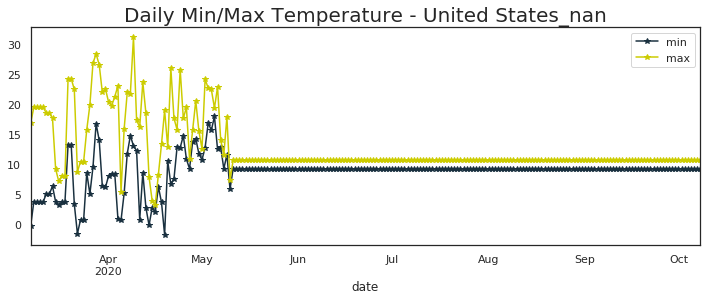

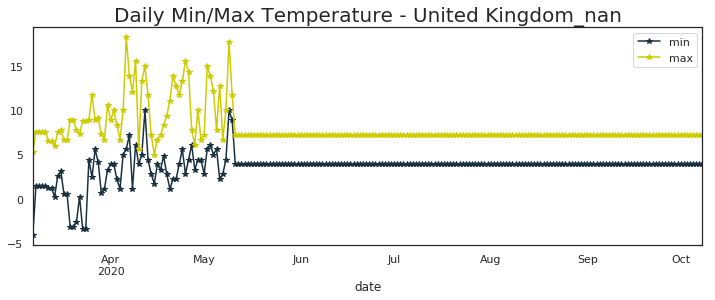

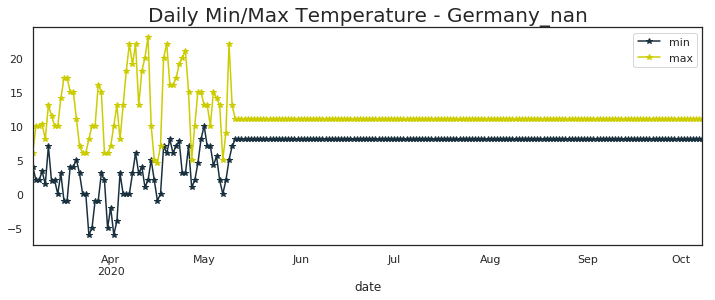

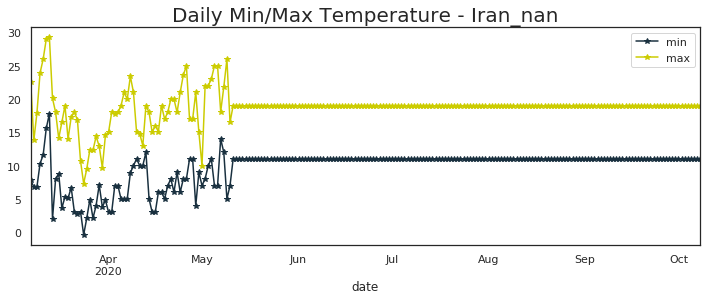

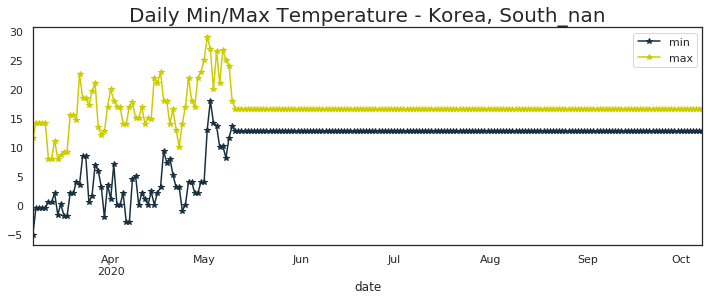

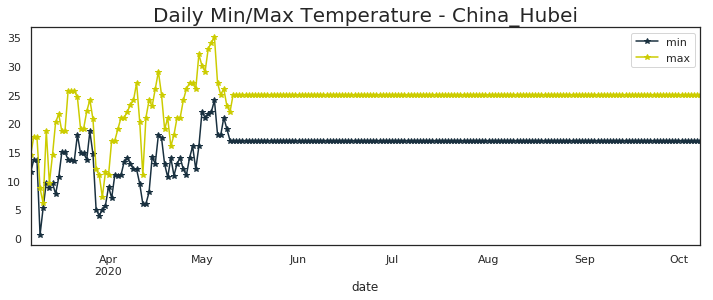

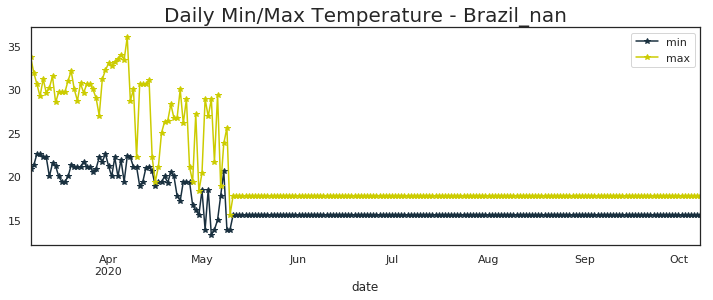

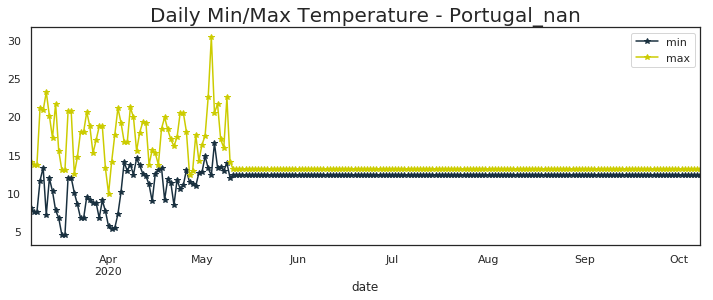

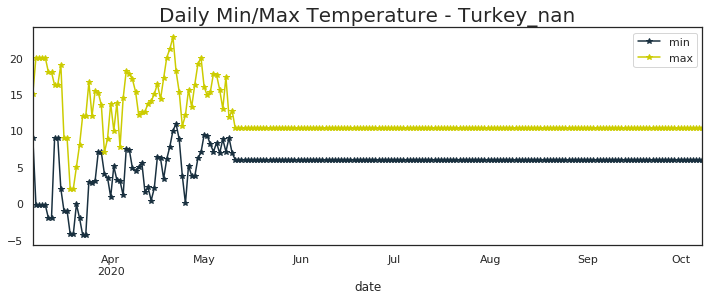

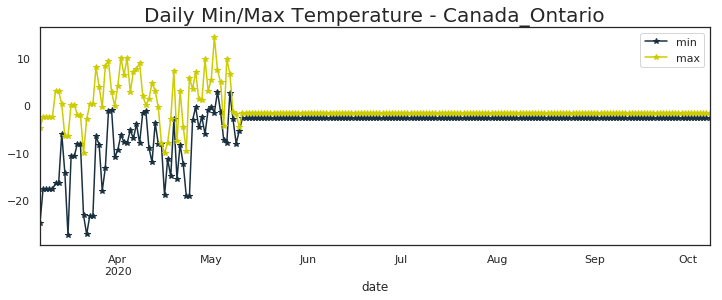

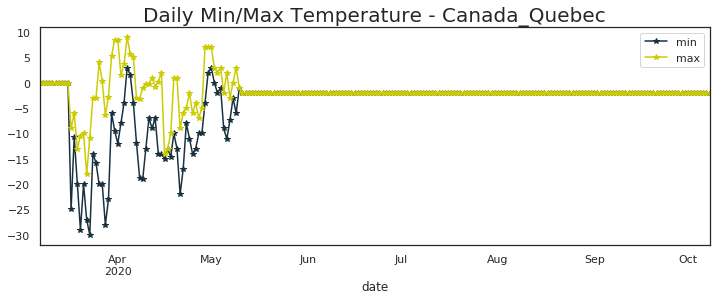

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
India_nan                   30.0  43.0
Brazil_nan                  22.6  36.0
Russia_nan                  13.0  30.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Spain_nan                   16.2  32.7
Peru_nan                     0.0   0.0
Mexico_nan                   0.0   0.0
South Africa_nan             0.0   0.0
France_nan                  14.2  23.8
United Kingdom_nan          10.0  18.3
Iran_nan                    17.8  29.3
Chile_nan                    0.0   0.0
Iraq_nan                    21.2  29.1
Bangladesh_nan               0.0   0.0
Saudi Arabia_nan             0.0   0.0
Italy_nan                   12.4  22.9
Philippines_nan             27.8  35.0
Turkey_nan                  10.9  22.8
Pakistan_nan                11.2  22.3
Indonesia_nan                0.0   0.0
Germany_nan                 

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

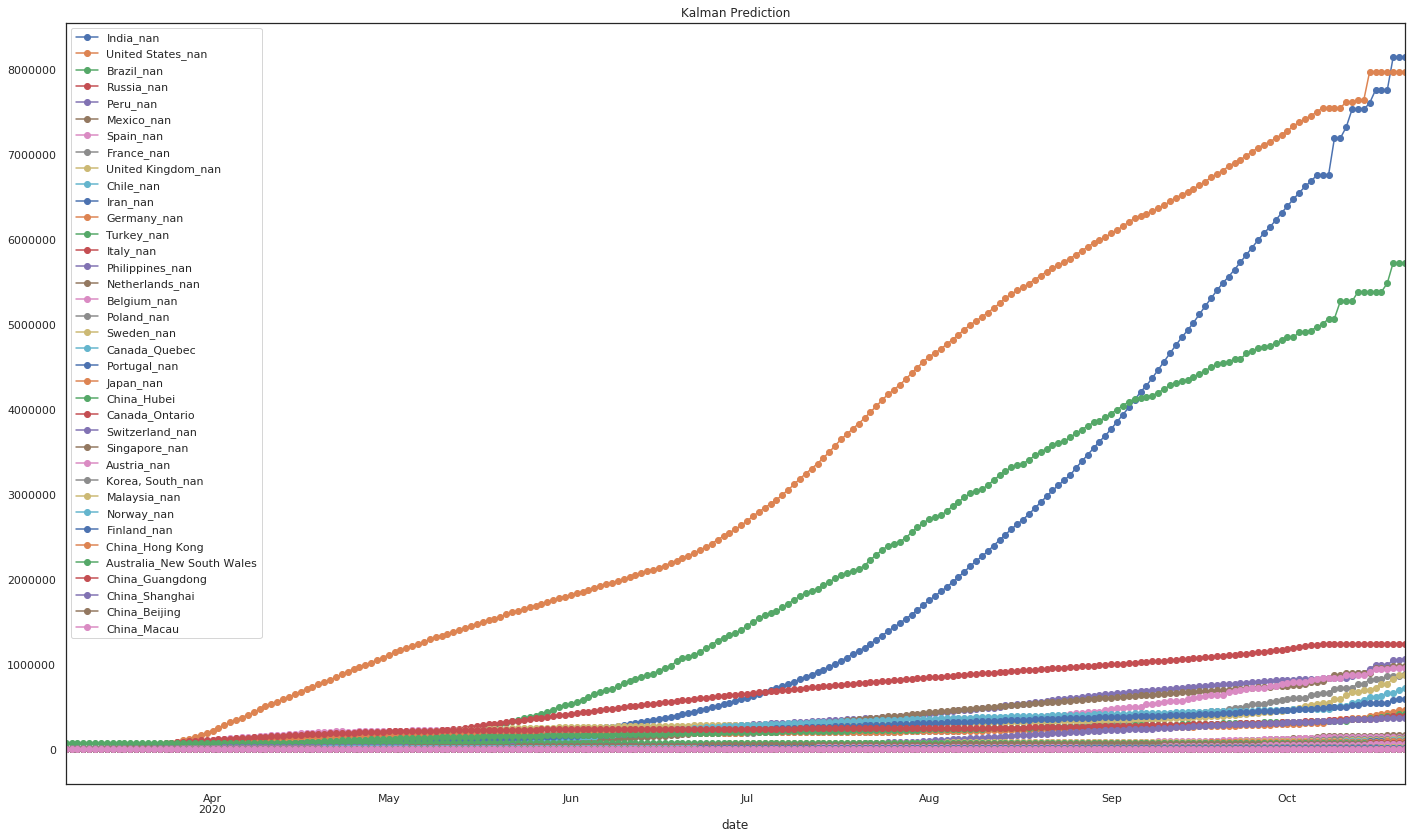

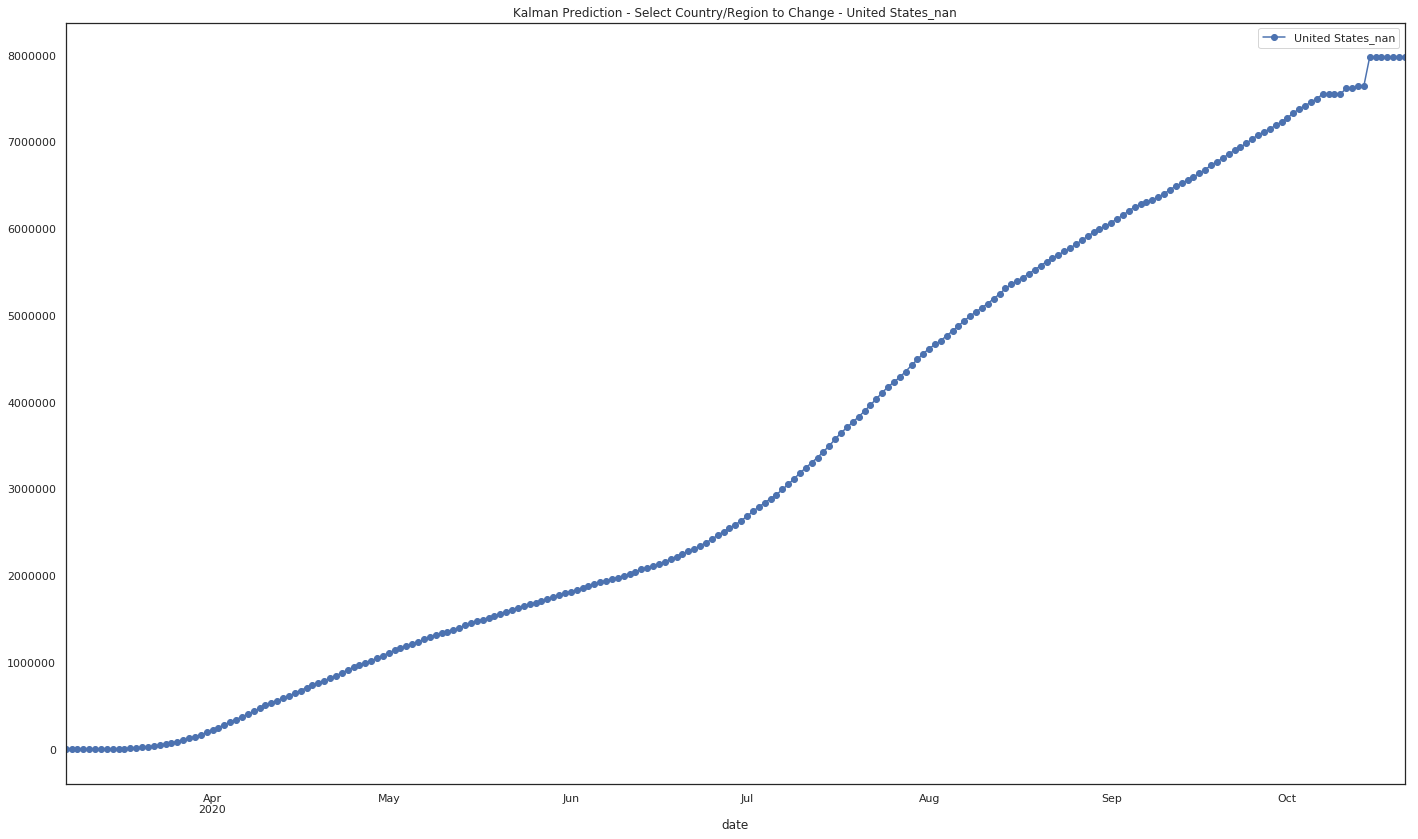

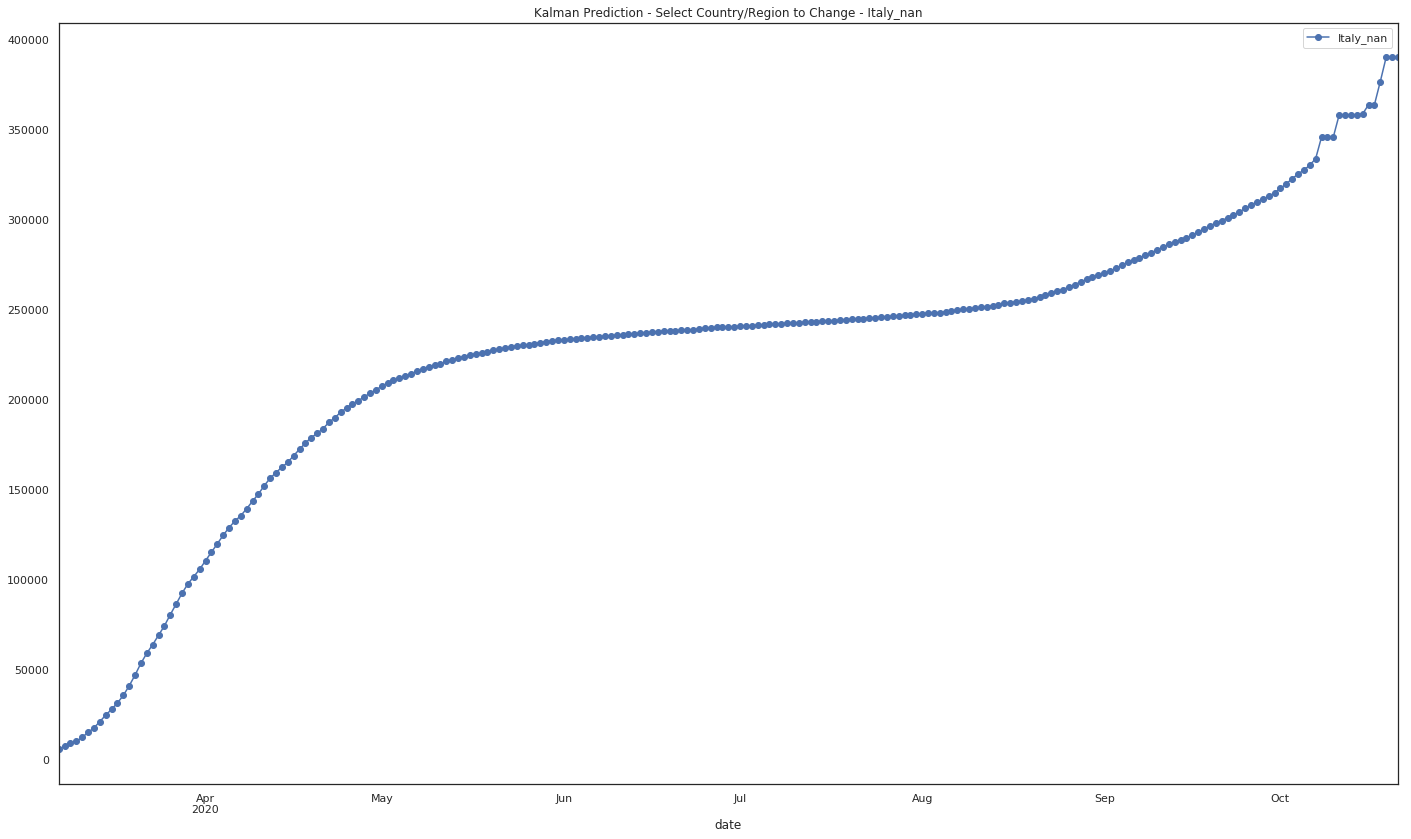

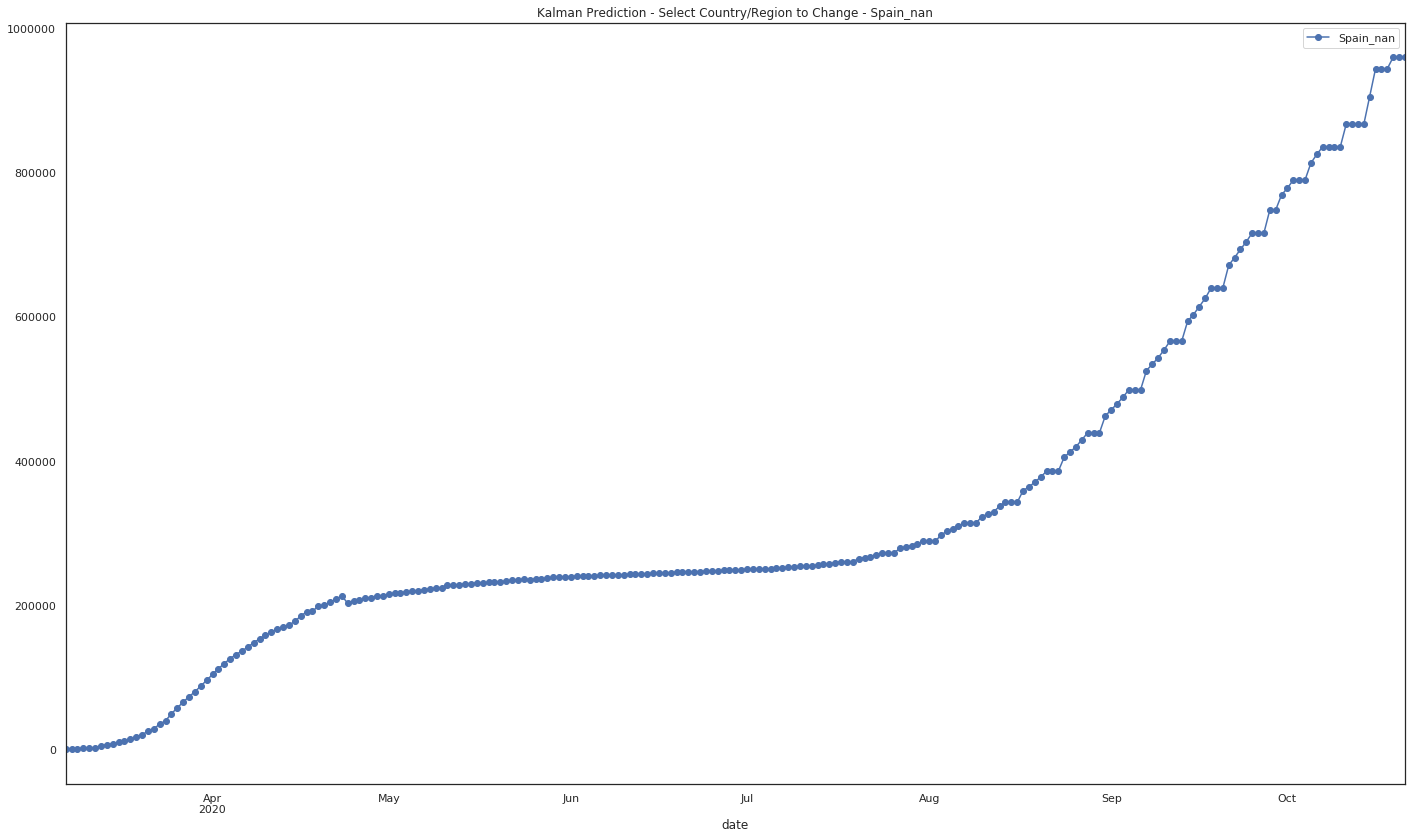

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


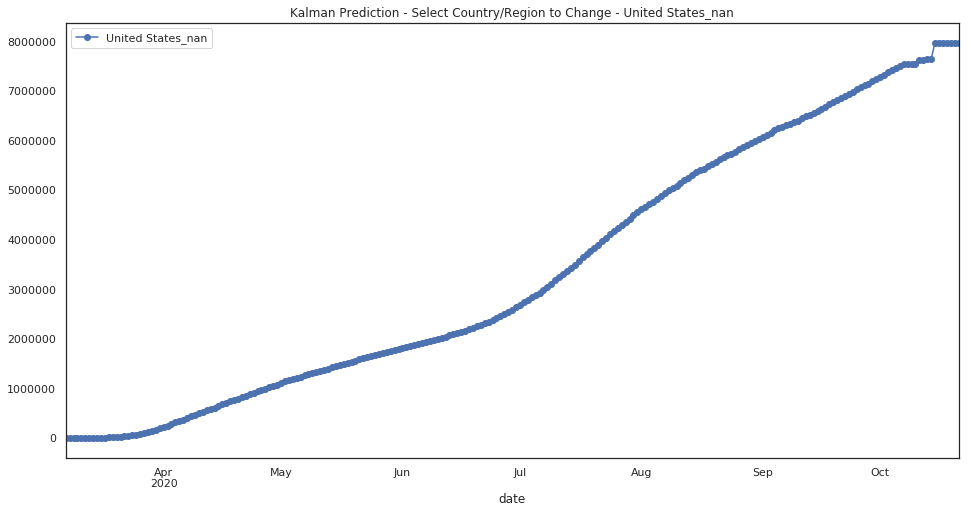

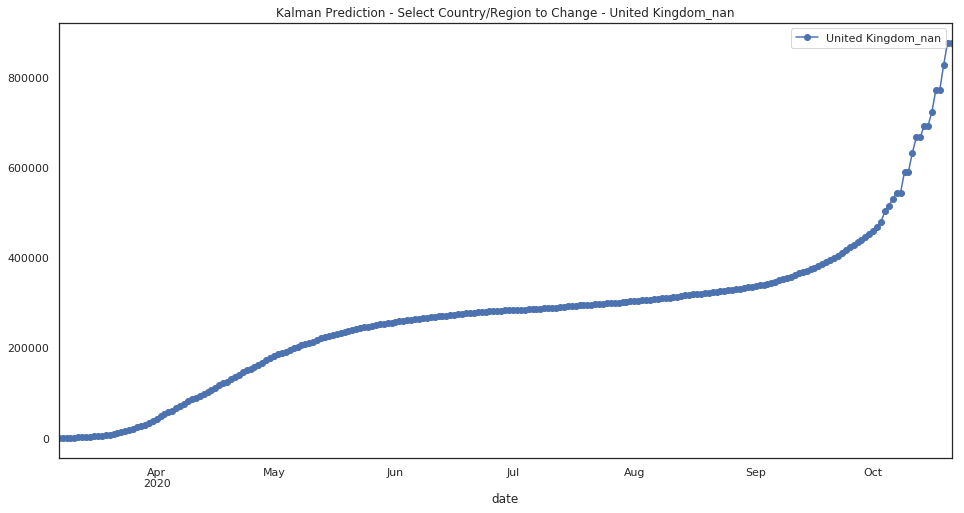

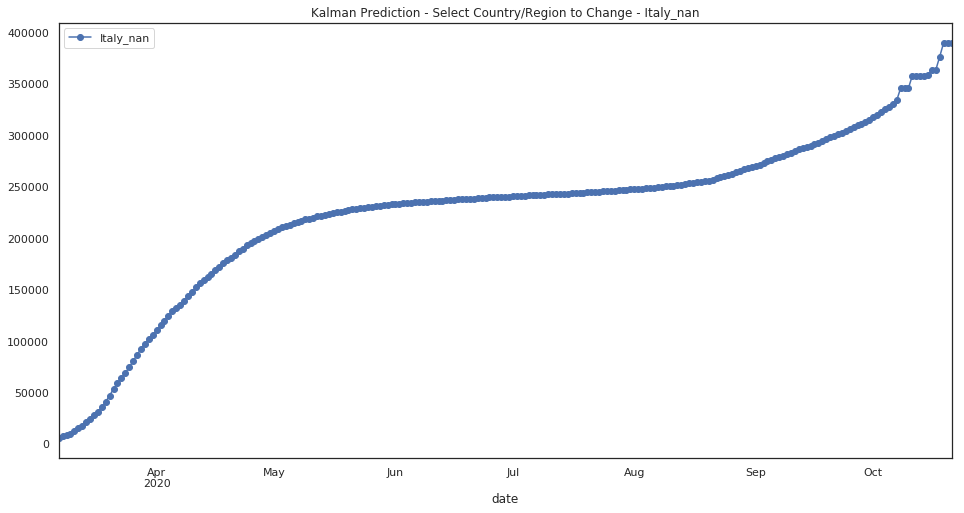

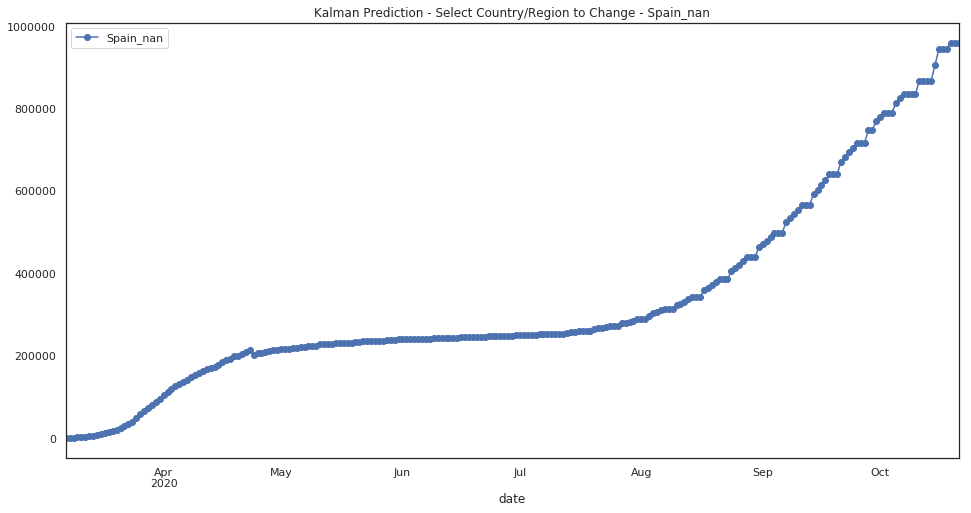

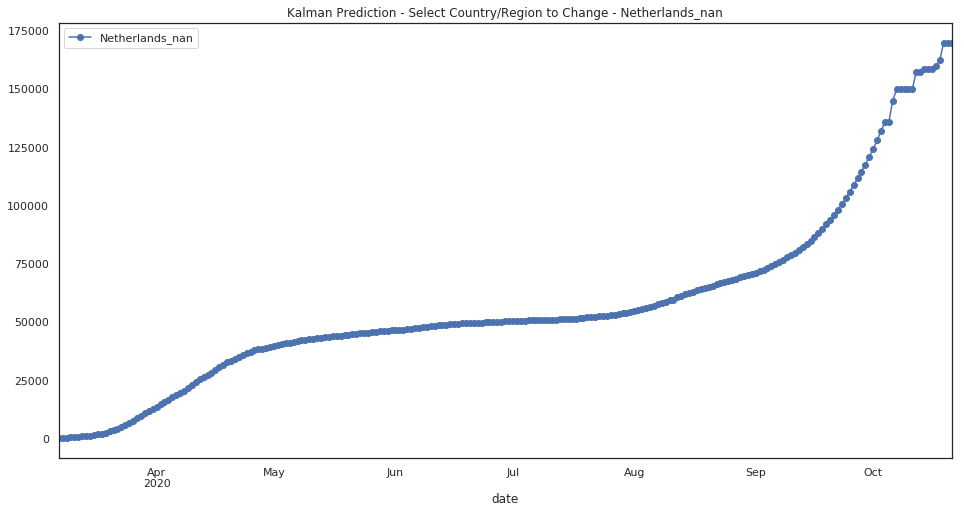

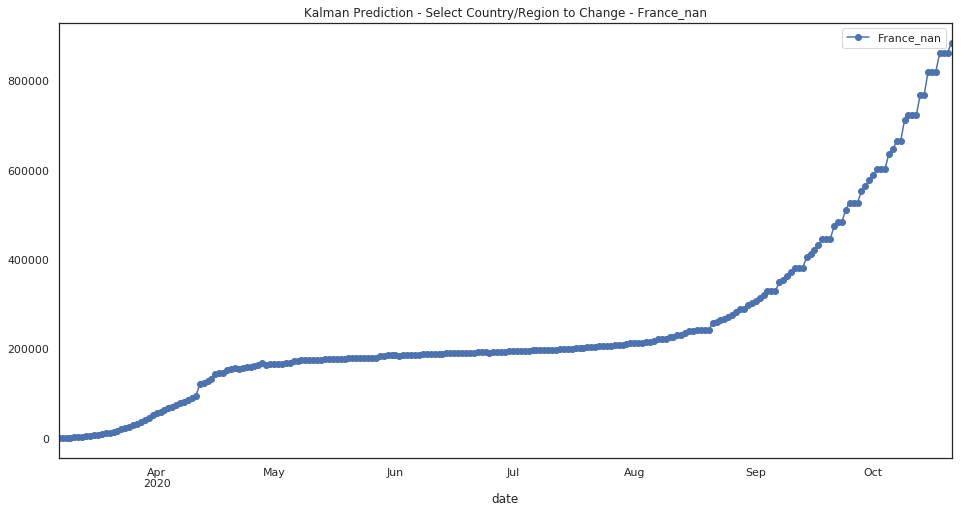

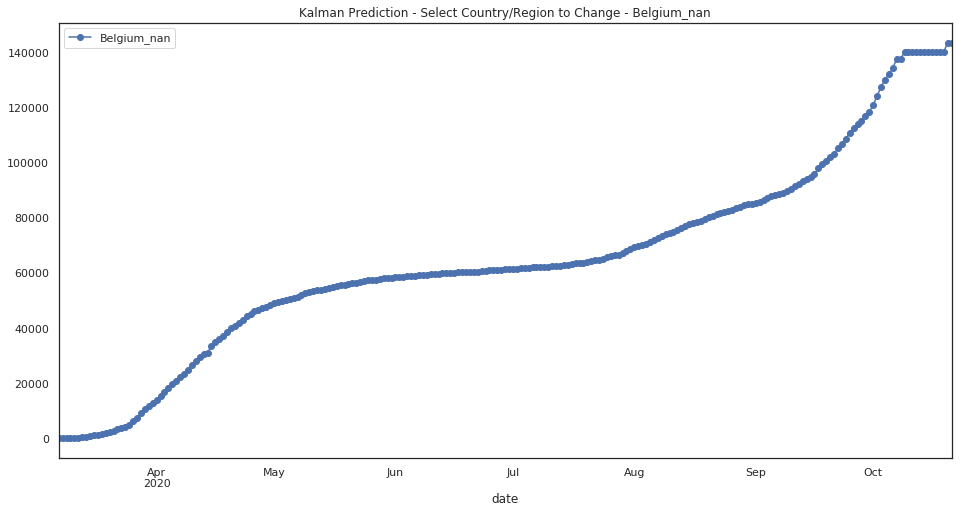

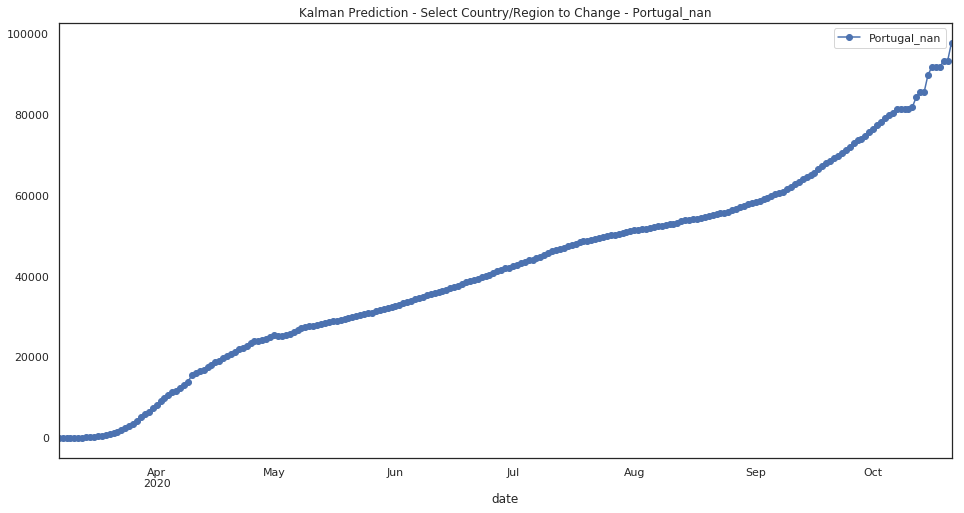

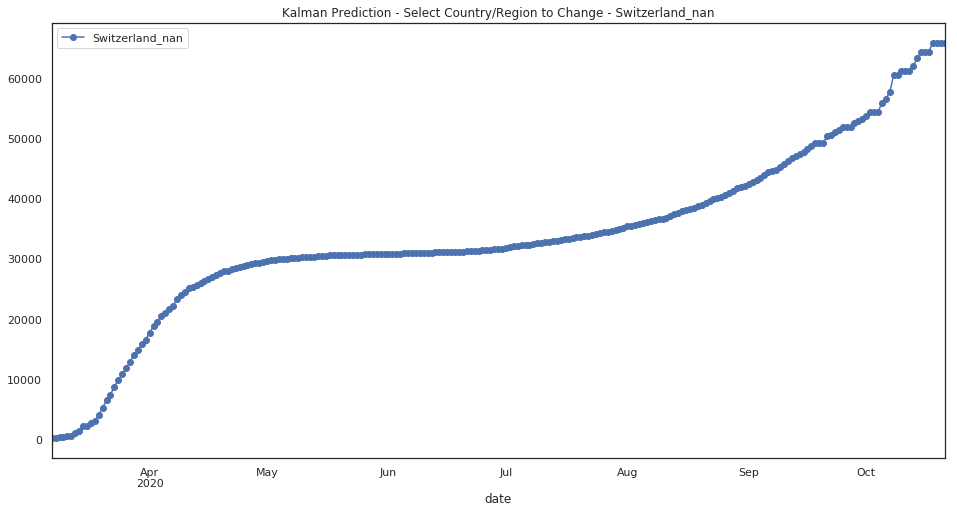

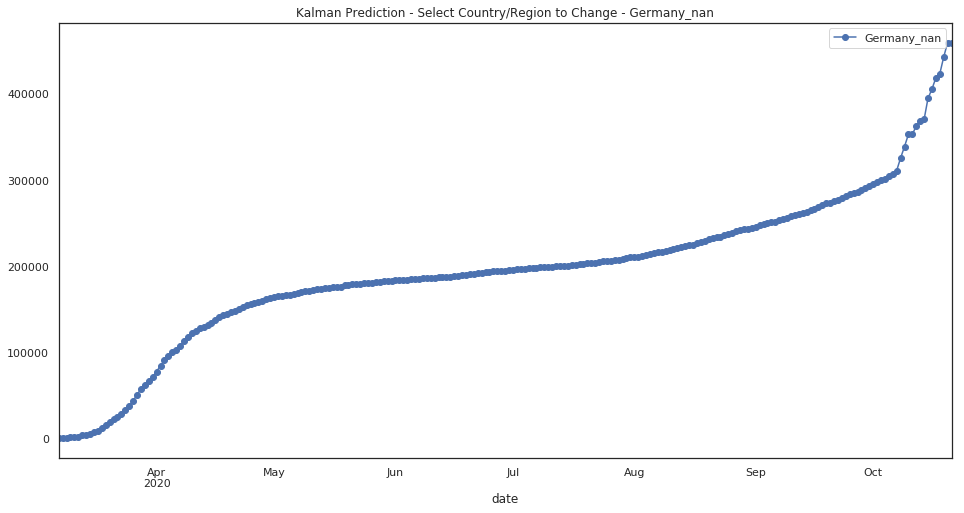

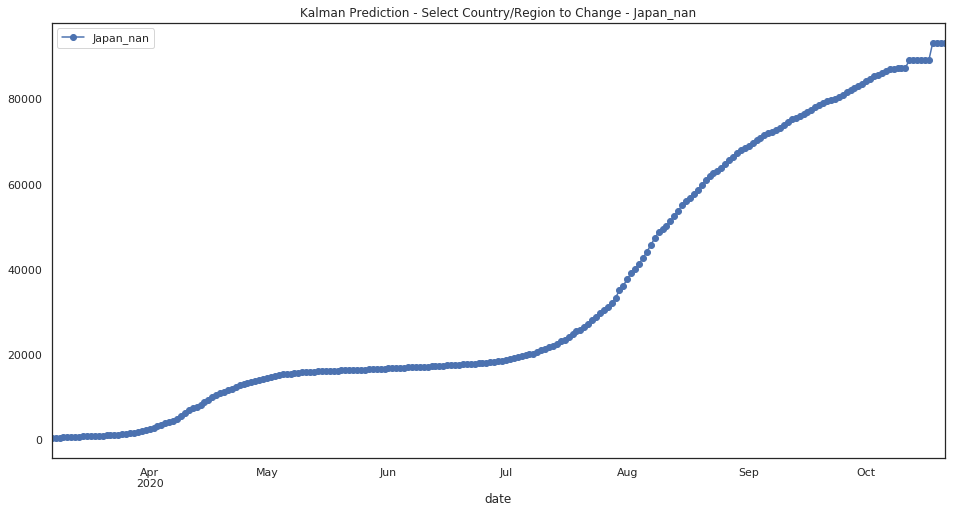

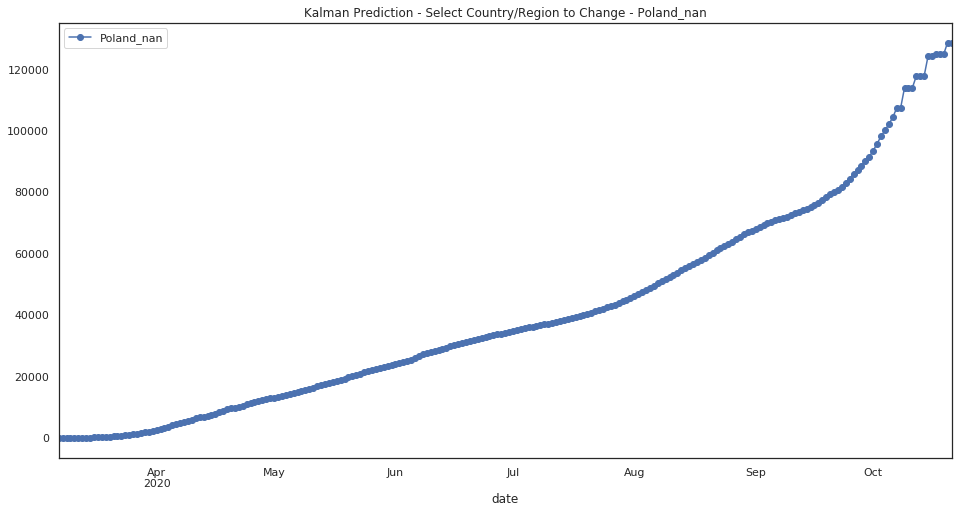

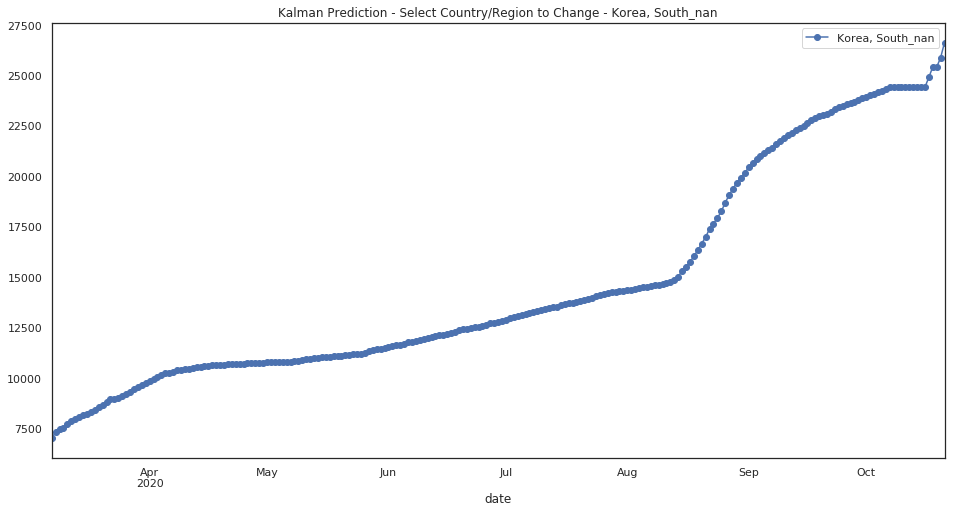

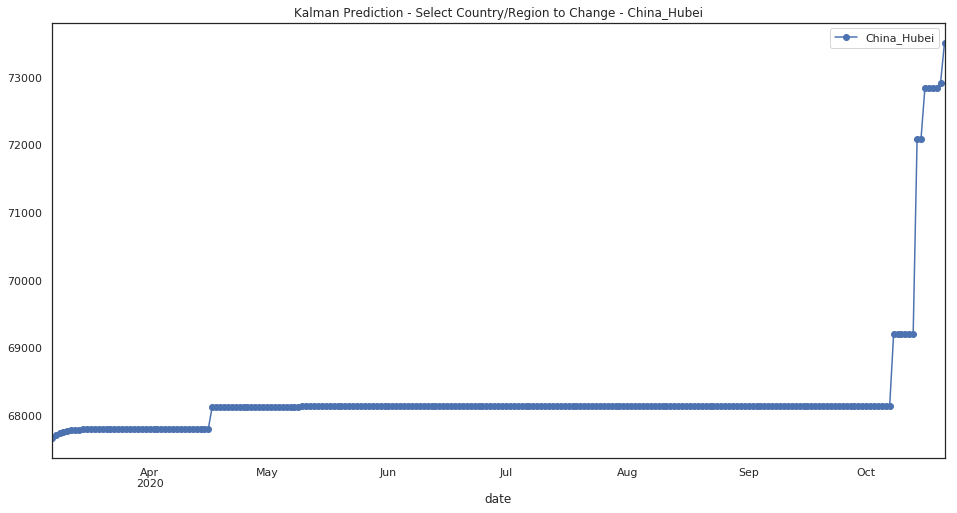

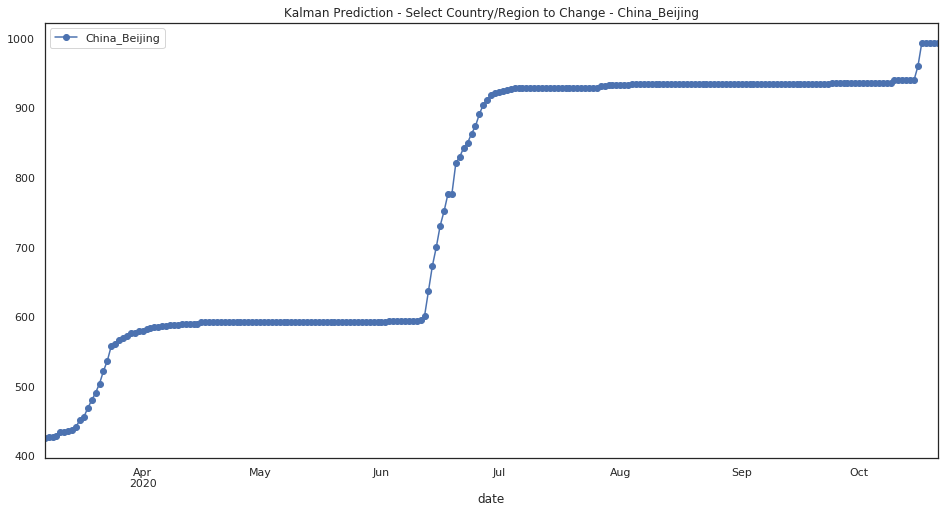

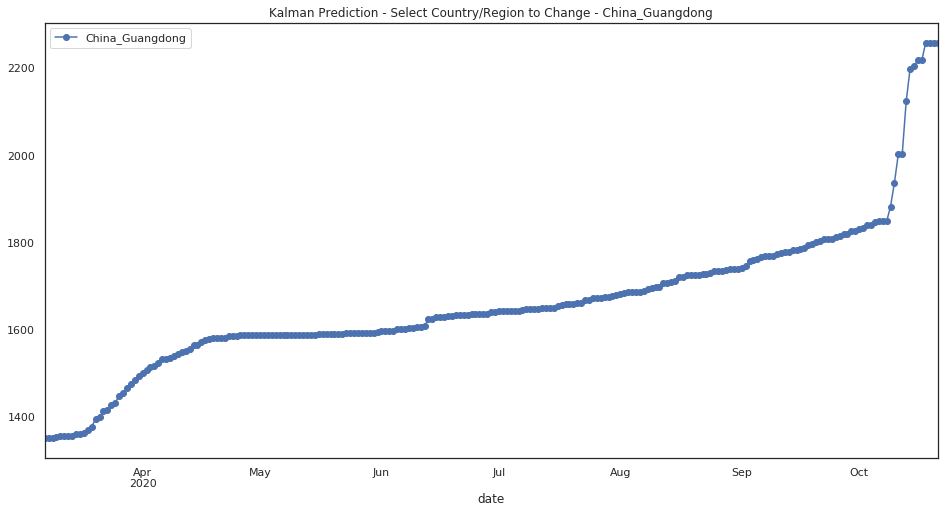

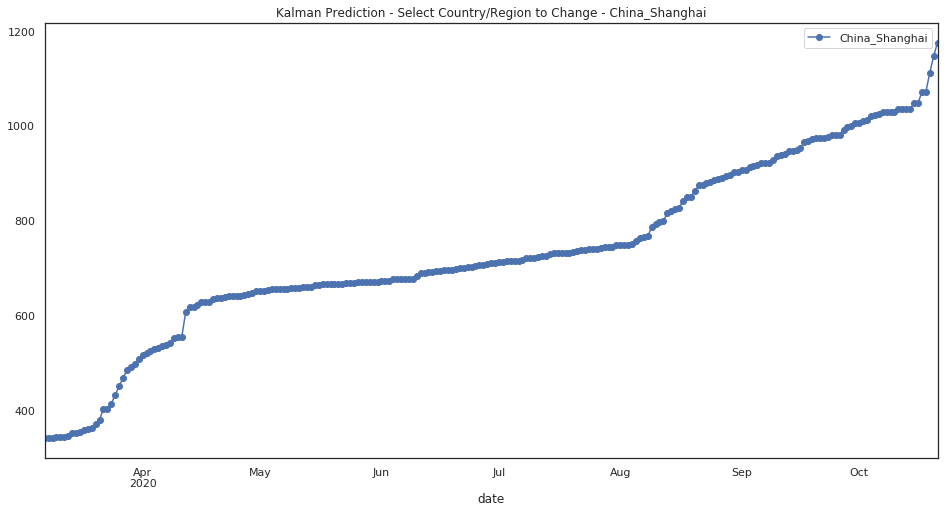

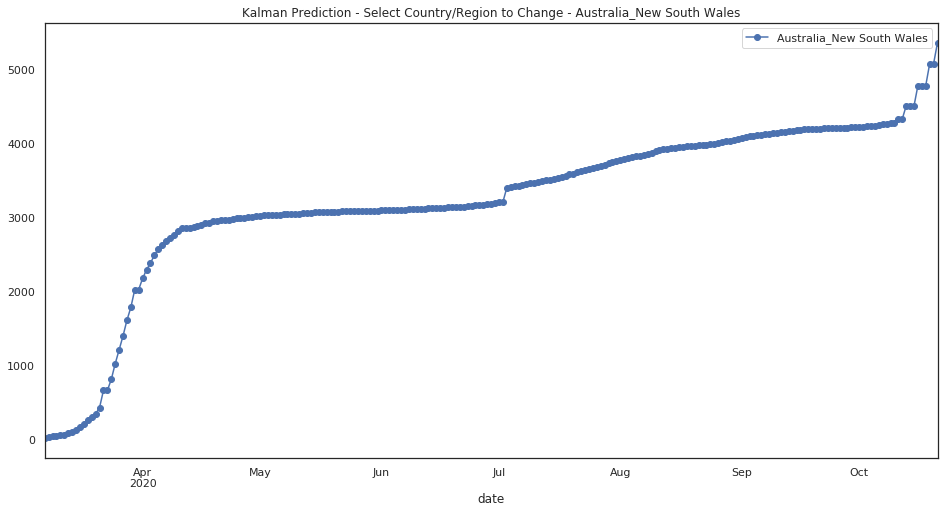

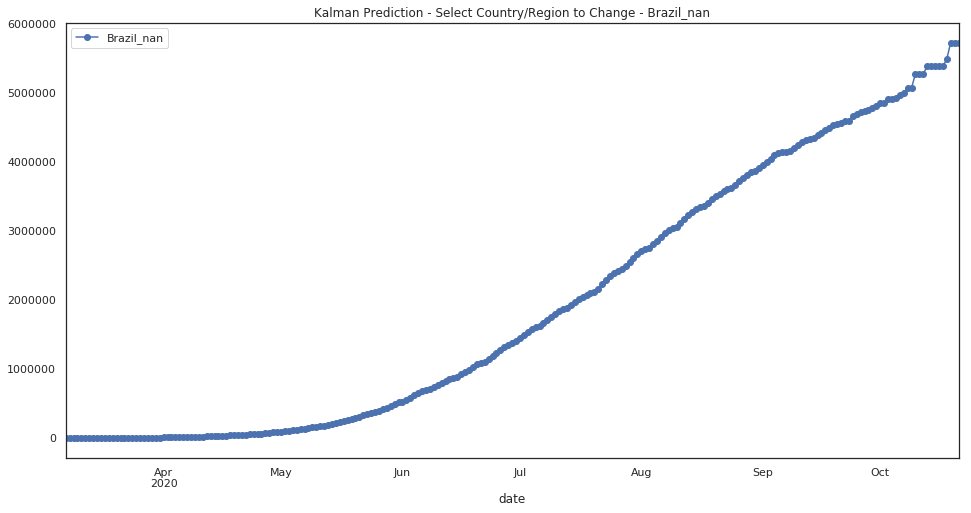

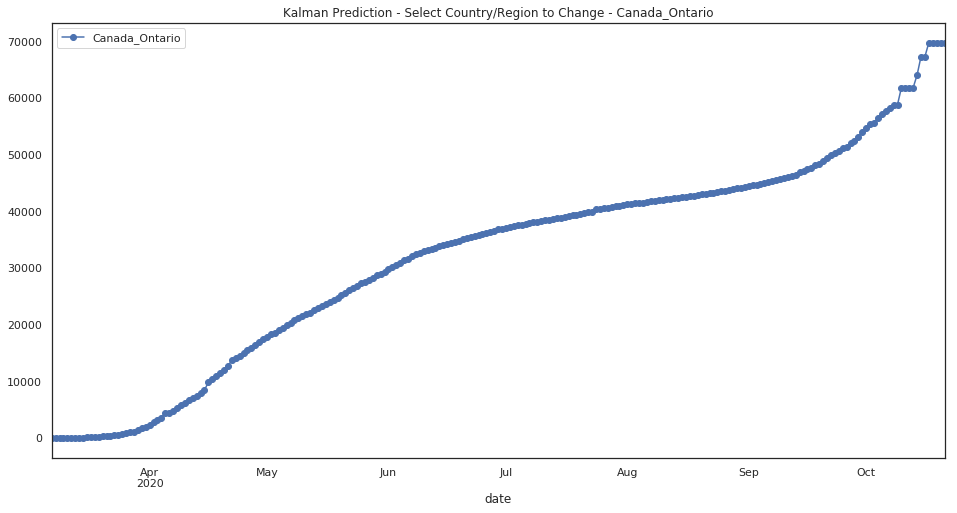

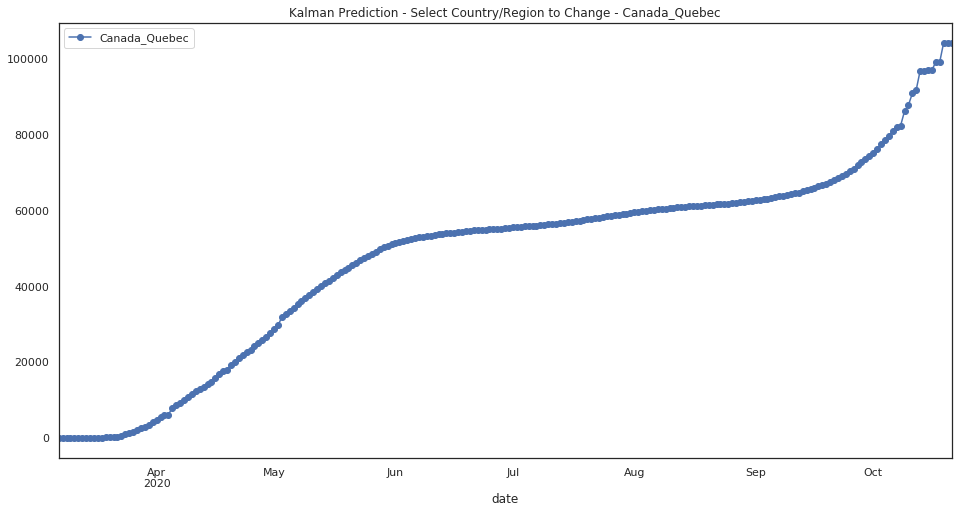

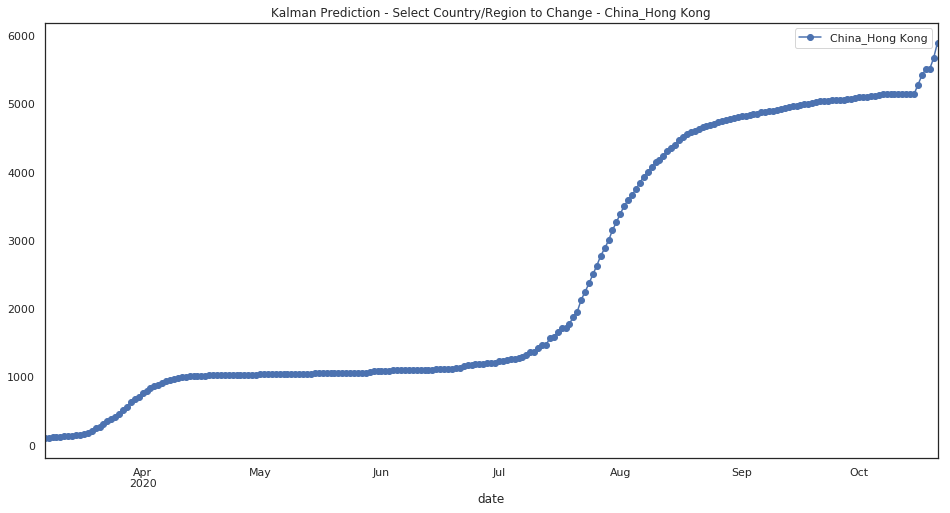

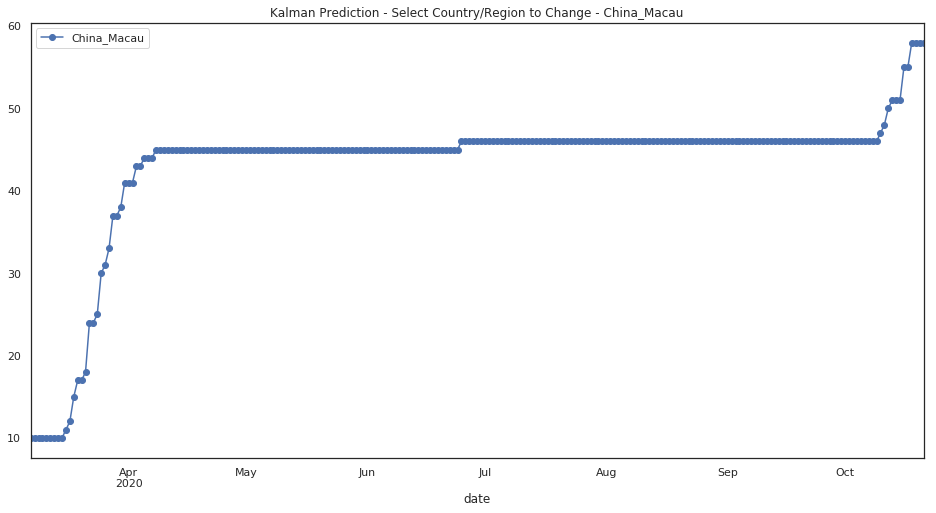

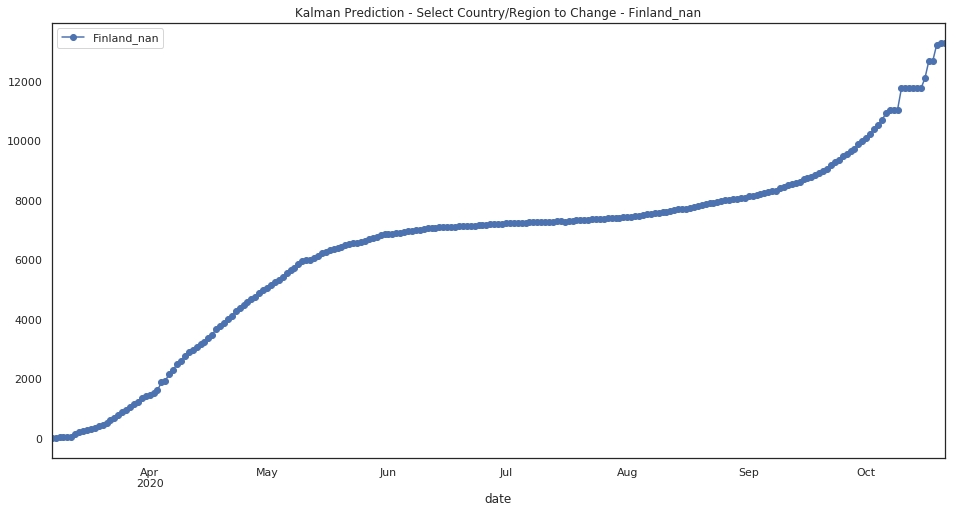

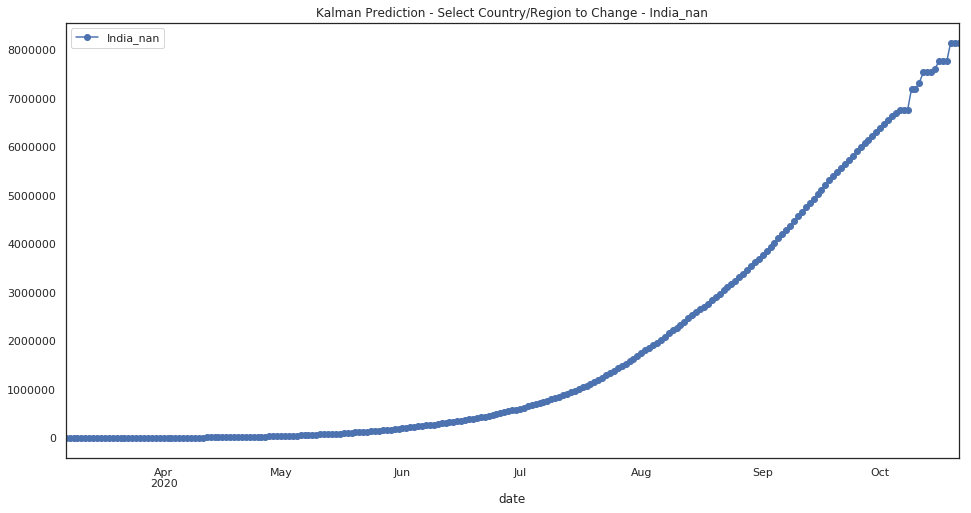

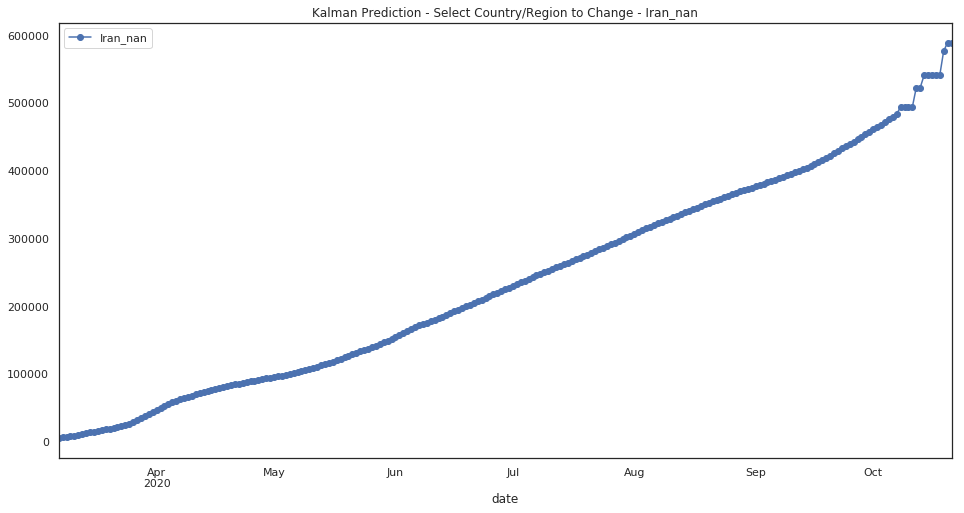

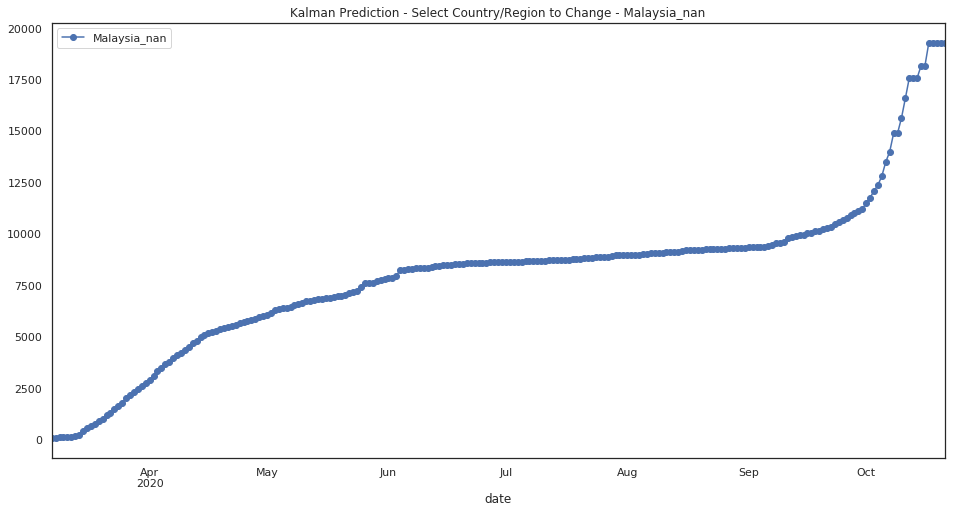

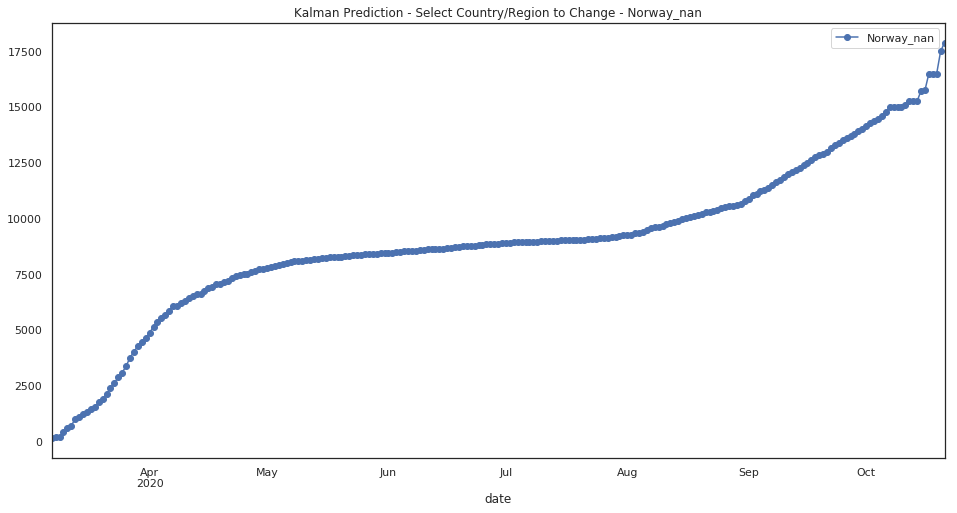

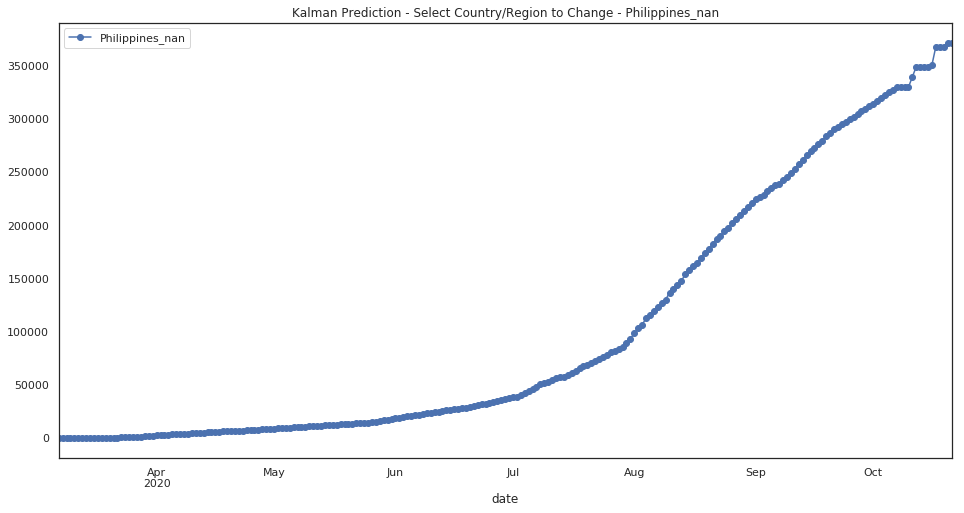

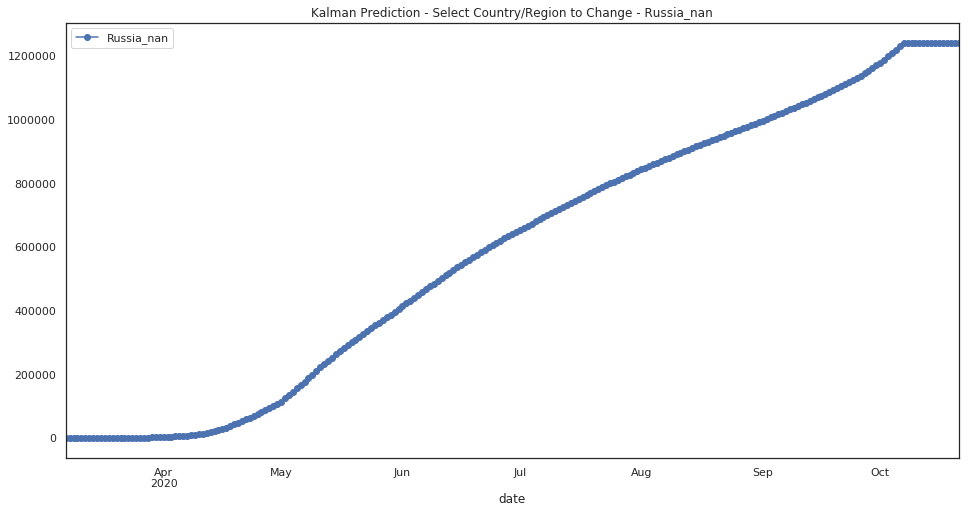

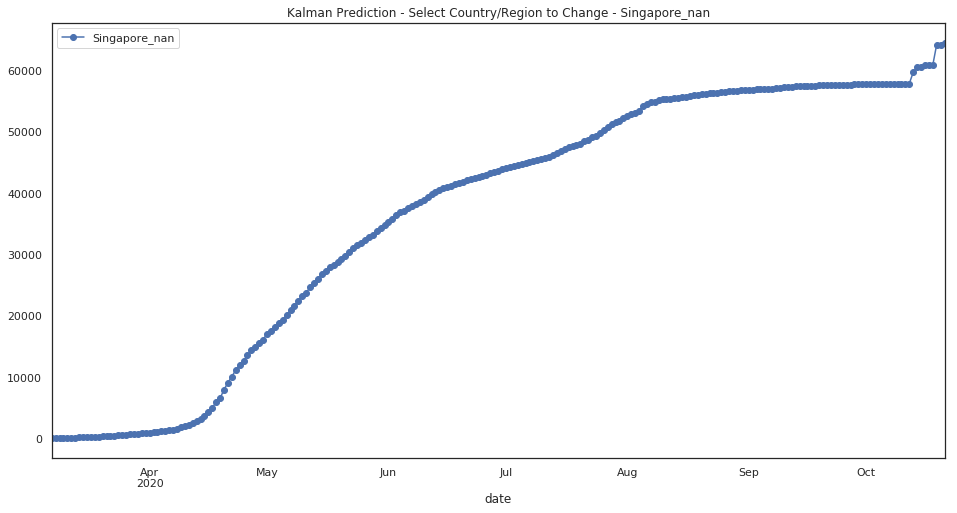

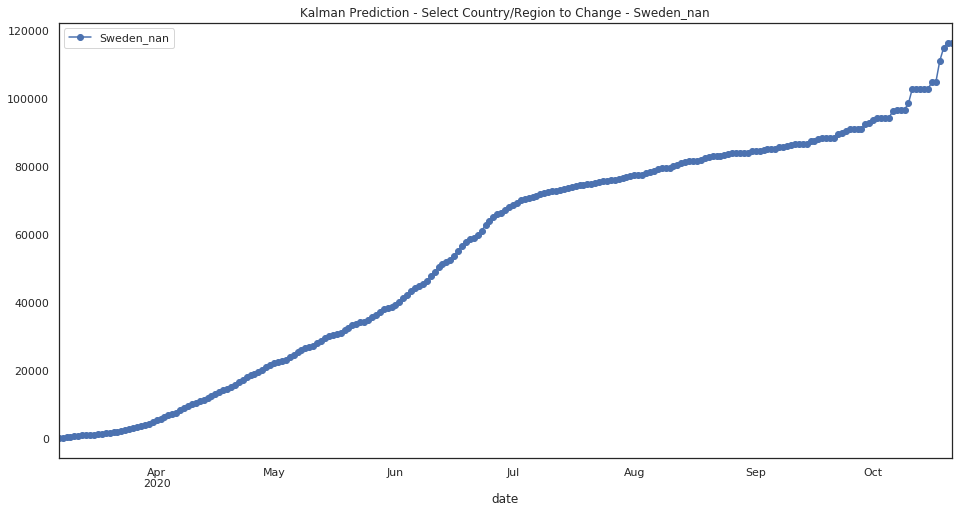

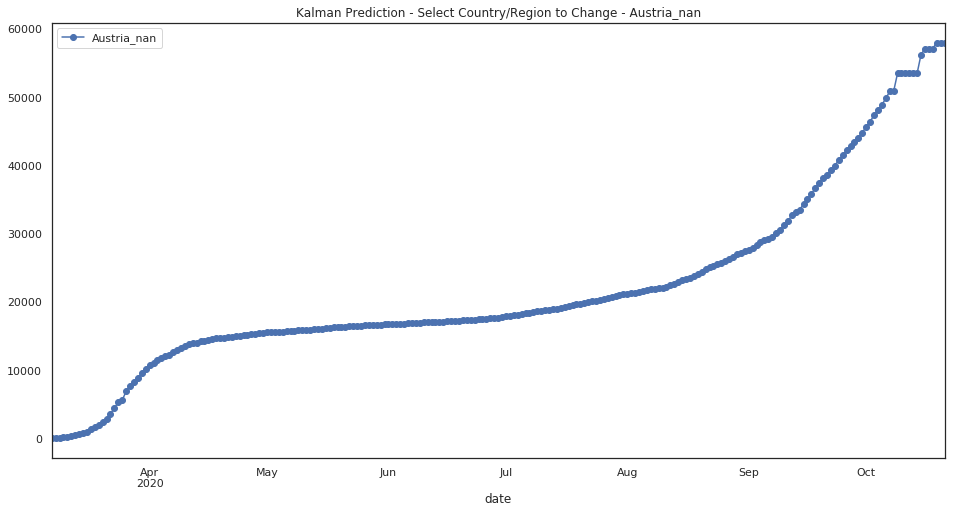

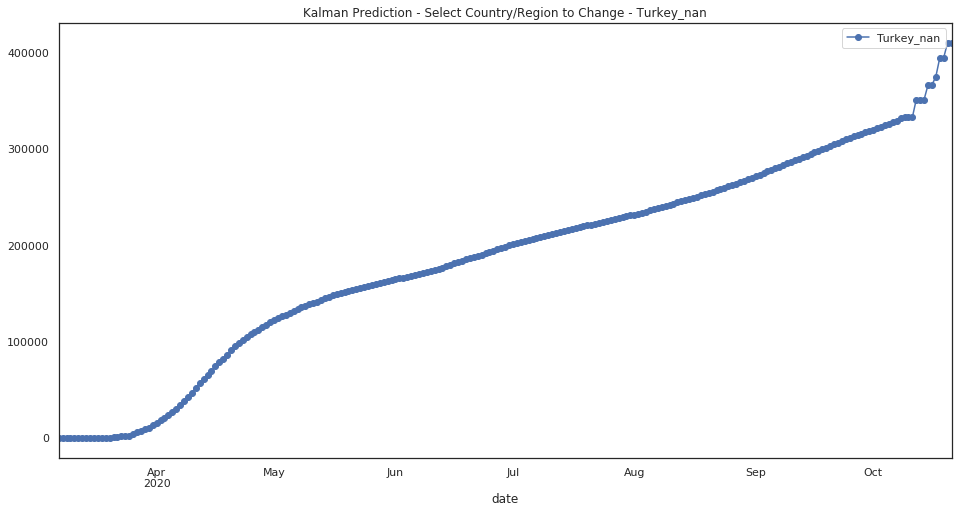

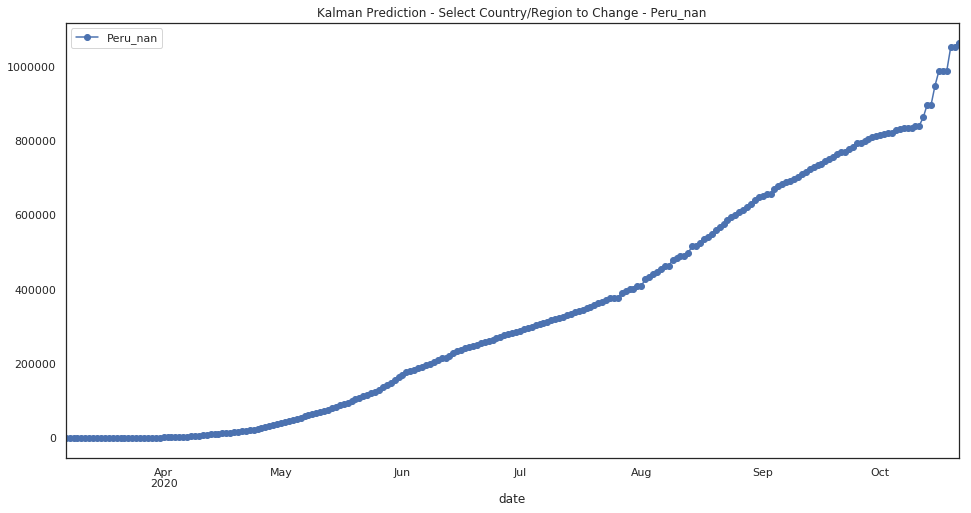

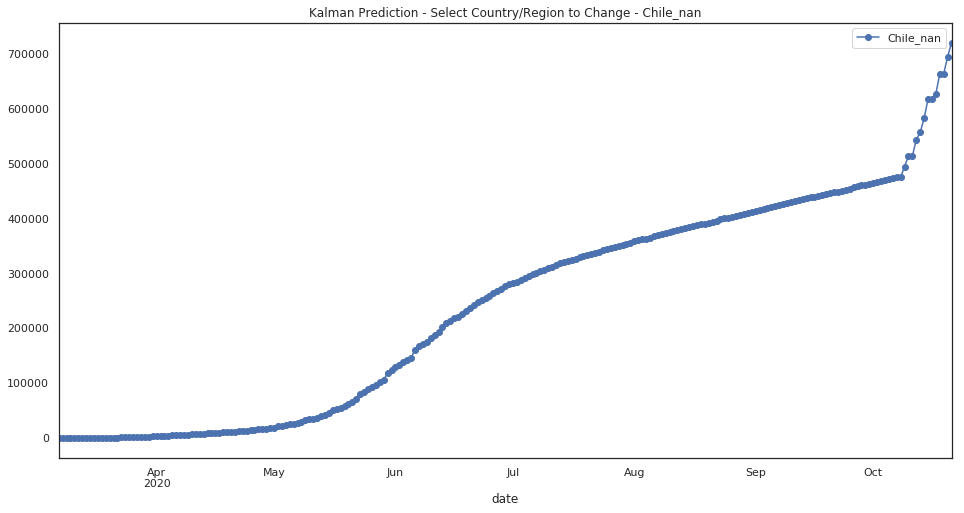

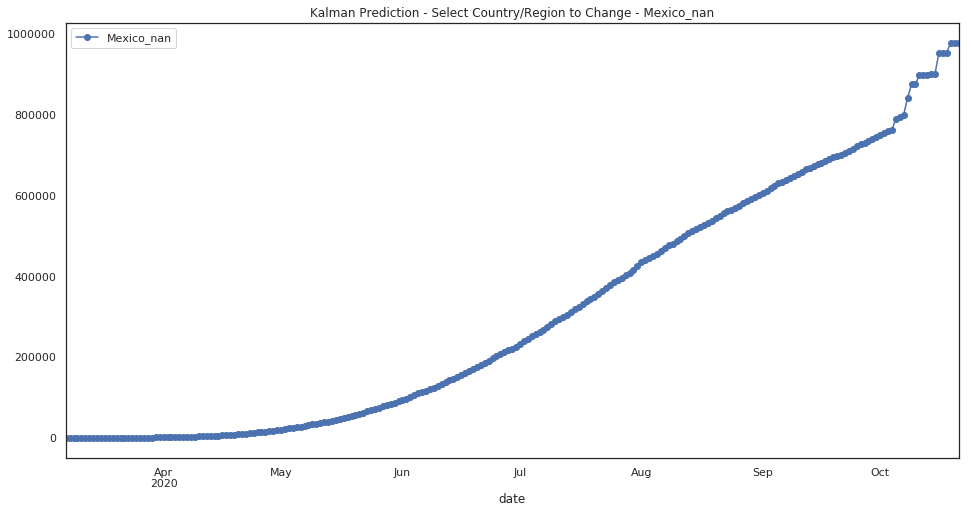

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-10-21 00:00:00
dtype: object


0  pred_confirmed
India_nan                                   NaN       8145210.0
United States_nan                           NaN       7976237.0
Brazil_nan                                  NaN       5725804.0
Russia_nan                                  NaN       1242258.0
Peru_nan                                    NaN       1063761.0
Mexico_nan                                  NaN        977707.0
Argentina_nan                               NaN        971200.0
Colombia_nan                                NaN        962828.0
Spain_nan                                   NaN        960118.0
France_nan                                  NaN        885301.0
United Kingdom_nan                          NaN        876972.0
South Africa_nan                            NaN        772601.0
Chile_nan                                   NaN        719622.0
Iran_nan                                    NaN        589022.0
Pakistan_nan                                NaN        474368.0
Iraq_nan                                    NaN        472371.0
Germany_nan                                 NaN        459659.0
Bangladesh_nan                              NaN        428561.0
Turkey_nan                                  NaN        410312.0
Indonesia_nan                               NaN        405388.0
Italy_nan                                   NaN        390233.0
Saudi Arabia_nan                            NaN        375617.0
Philippines_nan                             NaN        371566.0
Ukraine_nan                                 NaN        321983.0
Israel_nan                                  NaN        312071.0
Romania_nan                                 NaN        210134.0
Netherlands_nan                             NaN        169915.0
Ecuador_nan                                 NaN        166350.0
Bolivia_nan                                 NaN        155424.0
Morocco_nan                                 NaN        153009.0
...                                         ...             ...
Antigua and Barbuda_nan                     NaN           124.0
China_Ningxia                               NaN            92.0
France_Saint Barthelemy                     NaN            80.0
United Kingdom_British Virgin Islands       NaN            76.0
Saint Vincent and the Grenadines_nan        NaN            73.0
Canada_Prince Edward Island                 NaN            69.0
China_Macau                                 NaN            58.0
Fiji_nan                                    NaN            37.0
Australia_Northern Territory                NaN            36.0
Dominica_nan                                NaN            32.0
France_New Caledonia                        NaN            31.0
Saint Lucia_nan                             NaN            30.0
Timor-Leste_nan                             NaN            30.0
Laos_nan                                    NaN            26.0
Grenada_nan                                 NaN            25.0
China_Qinghai                               NaN            21.0
Saint Kitts and Nevis_nan                   NaN            20.0
Denmark_Greenland                           NaN            18.0
Canada_Yukon                                NaN            17.0
United Kingdom_Montserrat                   NaN            16.0
France_Saint Pierre and Miquelon            NaN            16.0
United Kingdom_Falkland Islands (Malvinas)  NaN            13.0
Canada_Grand Princess                       NaN            13.0
Holy See_nan                                NaN            12.0
Western Sahara_nan                          NaN            10.0
MS Zaandam_nan                              NaN             9.0
Canada_Northwest Territories                NaN             5.0
United Kingdom_Anguilla                     NaN             3.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             1.0

[266 rows x 2 columns]

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-07             72.0         42.0         91.0         42.0   
2020-03-08             76.0         42.0         91.0         42.0   
2020-03-09              4.0         42.0         66.0          2.0   
2020-03-10             30.0         46.0         66.0          2.0   
2020-03-11             73.0         10.0         81.0         10.0   
2020-03-12             39.0         12.0         85.0         10.0   
2020-03-13             59.0         90.0         83.0         10.0   
2020-03-14             58.0         47.0         93.0         10.0   
2020-03-15             70.0         65.0        105.0         13.0   
2020-03-16             69.0         61.0        123.0         13.0   
2020-03-17             89.0        128.0        136.0          2.0   
2020-03-18             89.0         85.0        143.0         39.0   
2020-03-19             83.0         88.0        157.0        484.0   
2020-03-20             81.0         86.0        171.0        416.0   
2020-03-21             81.0         90.0        187.0        281.0   
2020-03-22             85.0         97.0        237.0        340.0   
2020-03-23             82.0        111.0        306.0        427.0   
2020-03-24            109.0        128.0        342.0        336.0   
2020-03-25            130.0        150.0        379.0        210.0   
2020-03-26            157.0        178.0        426.0        242.0   
2020-03-27            173.0        206.0        495.0        283.0   
2020-03-28            182.0        218.0        540.0        328.0   
2020-03-29            187.0        230.0        585.0        370.0   
2020-03-30            200.0        244.0        646.0        396.0   
2020-03-31            246.0        256.0        739.0        430.0   
2020-04-01            259.0        275.0        890.0        431.0   
2020-04-02            325.0        290.0       1030.0        451.0   
2020-04-03            357.0        308.0       1185.0        488.0   
2020-04-04            363.0        338.0       1371.0        494.0   
2020-04-05            394.0        369.0       1432.0        524.0   
...                     ...          ...          ...          ...   
2020-09-23          39365.0      12822.0      50785.0       1792.0   
2020-09-24          39427.0      12944.0      50967.0       1866.0   
2020-09-25          39447.0      13082.0      51143.0       1877.0   
2020-09-26          39462.0      13200.0      51313.0       1958.0   
2020-09-27          39475.0      13299.0      51468.0       1943.0   
2020-09-28          39502.0      13406.0      51618.0       1973.0   
2020-09-29          39504.0      13542.0      51764.0       2109.0   
2020-09-30          39529.0      13666.0      51924.0       2094.0   
2020-10-01          39542.0      13803.0      52087.0       2178.0   
2020-10-02          39558.0      13968.0      52246.0       2182.0   
2020-10-03          39563.0      14127.0      52402.0       2238.0   
2020-10-04          39583.0      14280.0      52550.0       2230.0   
2020-10-05          39647.0      14433.0      52692.0       2289.0   
2020-10-06          39739.0      14581.0      52828.0       2566.0   
2020-10-07          39800.0      14747.0      52956.0       2541.0   
2020-10-08          40248.0      14876.0      53049.0       2750.0   
2020-10-09          42120.0      14826.0      53620.0       2722.0   
2020-10-10          41912.0      14903.0      56515.0       2748.0   
2020-10-11          43249.0      15286.0      55750.0       2933.0   
2020-10-12          43068.0      15167.0      55738.0       2944.0   
2020-10-13          43296.0      15149.0      55990.0       3164.0   
2020-10-14          44533.0      15165.0      55979.0       3122.0   
2020-10-15          44234.0      15317.0      56198.0       3124.0   
2020-10-16          44199.0      16134.0      57292.0       3145.0   
2020-10-17

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['India_nan',
 'United States_nan',
 'Brazil_nan',
 'Russia_nan',
 'Peru_nan',
 'Mexico_nan',
 'Argentina_nan',
 'Colombia_nan',
 'Spain_nan',
 'France_nan',
 'United Kingdom_nan',
 'South Africa_nan',
 'Chile_nan',
 'Iran_nan',
 'Pakistan_nan',
 'Iraq_nan',
 'Germany_nan',
 'Bangladesh_nan',
 'Turkey_nan',
 'Indonesia_nan',
 'Italy_nan',
 'Saudi Arabia_nan',
 'Philippines_nan',
 'Ukraine_nan',
 'Israel_nan',
 'Romania_nan',
 'Netherlands_nan',
 'Ecuador_nan',
 'Bolivia_nan',
 'Morocco_nan',
 'Belgium_nan',
 'Kazakhstan_nan',
 'Dominican Republic_nan',
 'Qatar_nan',
 'Poland_nan',
 'Panama_nan',
 'Kuwait_nan',
 'Belarus_nan',
 'Sweden_nan',
 'Guatemala_nan',
 'United Arab Emirates_nan',
 'Egypt_nan',
 'Costa Rica_nan',
 'Czechia_nan',
 'Oman_nan',
 'Venezuela_nan',
 'Canada_Quebec',
 'Ethiopia_nan',
 'Nepal_nan',
 'Portugal_nan',
 'Honduras_nan',
 'Japan_nan',
 'Bahrain_nan',
 'Nigeria_nan',
 'China_Hubei',
 'Moldova_nan',
 'Uzbekistan_nan',
 'Canada_Ontario',
 'Lebanon_nan',
 'Switzer

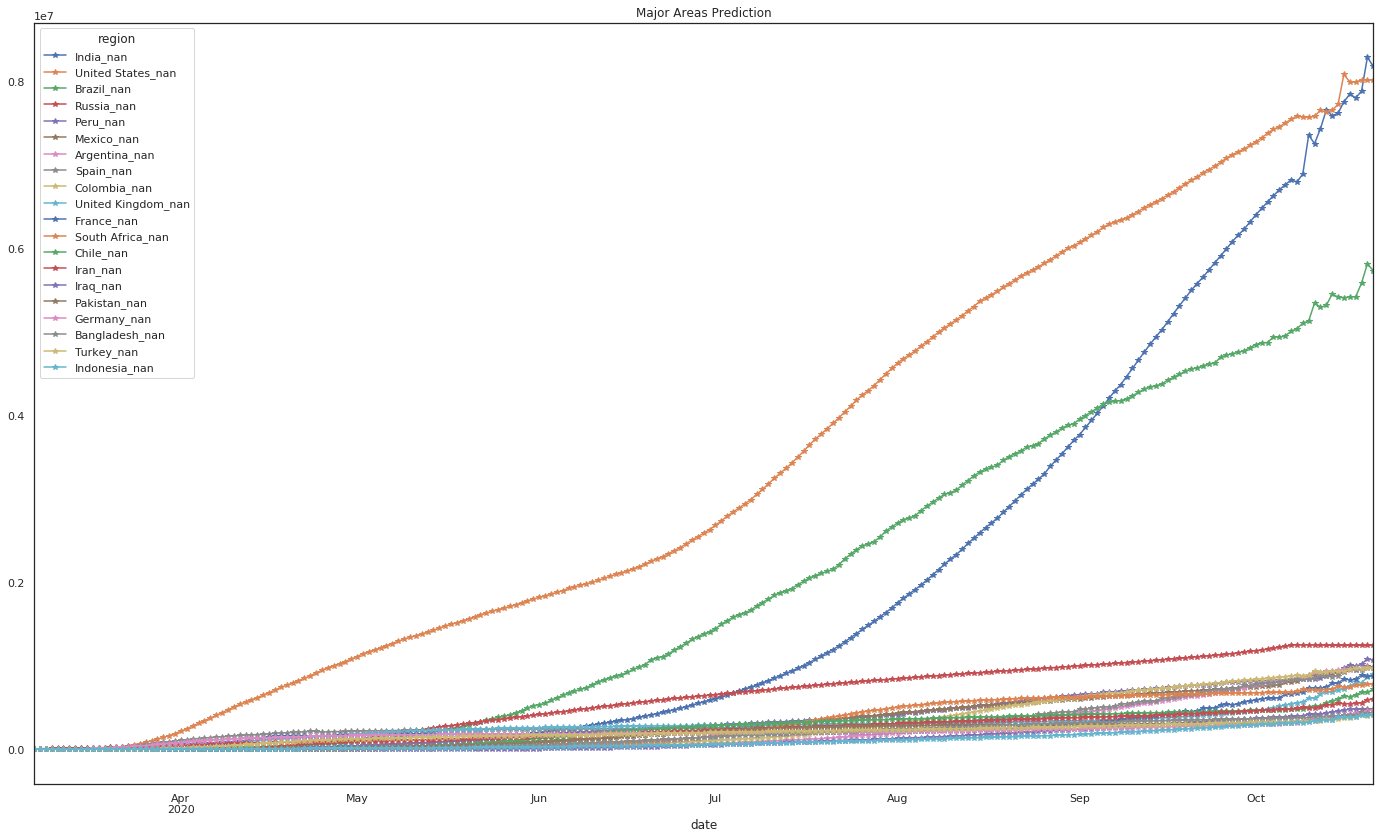

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

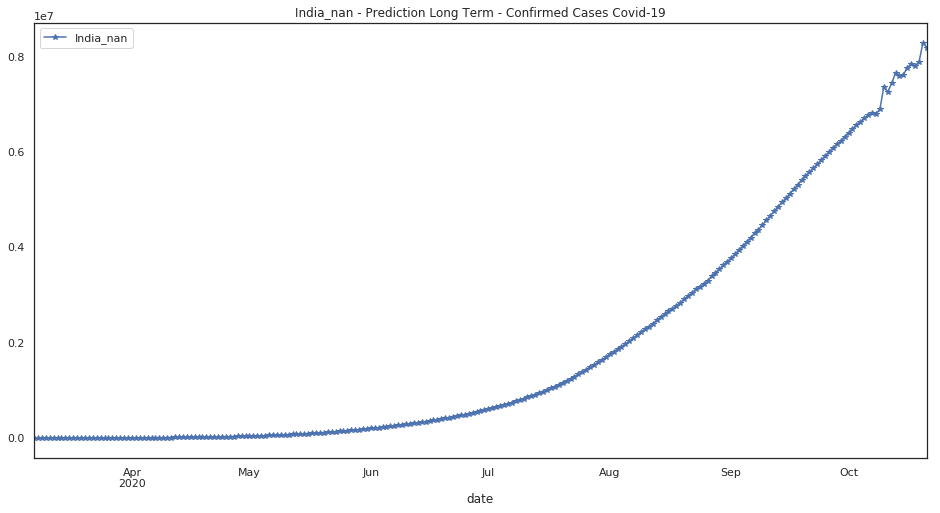

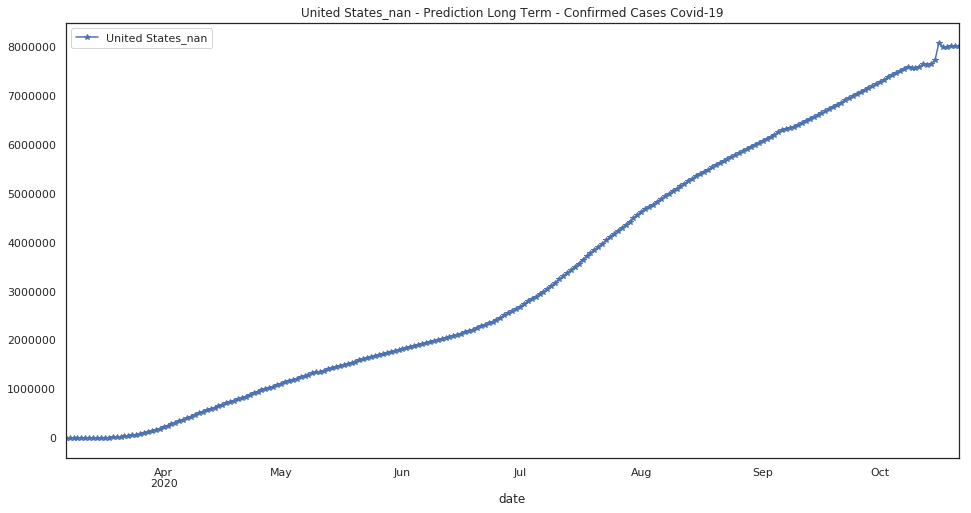

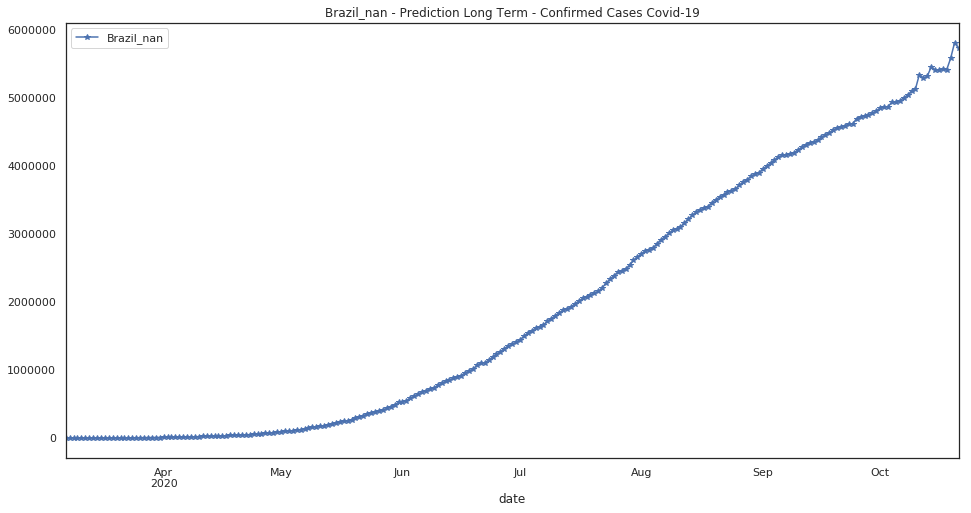

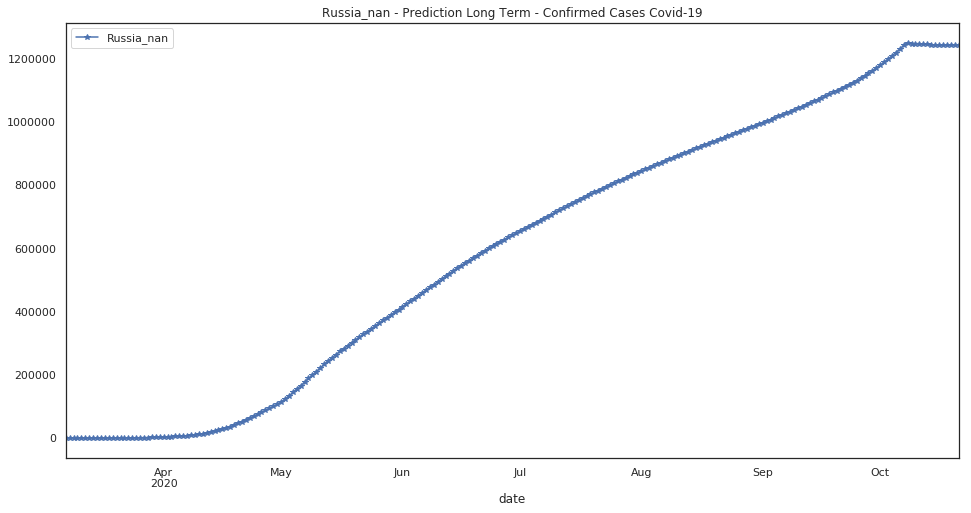

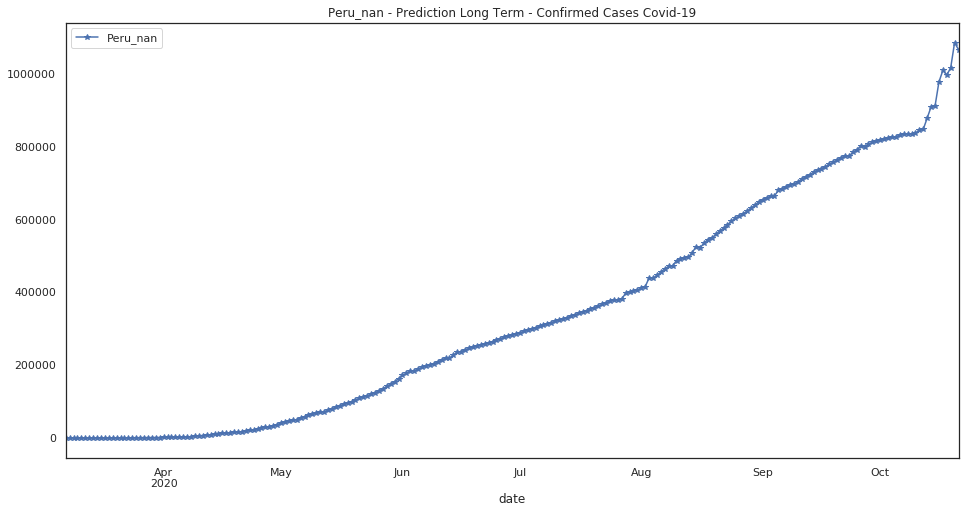

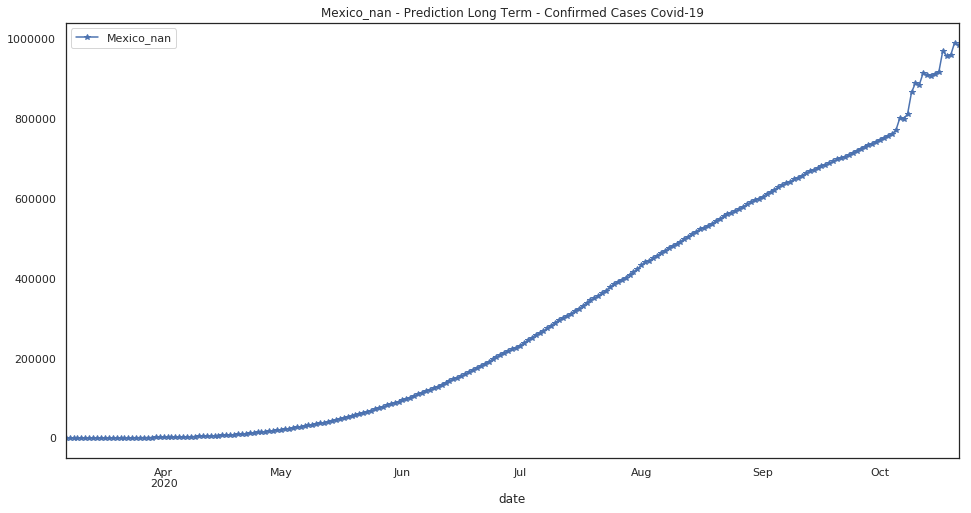

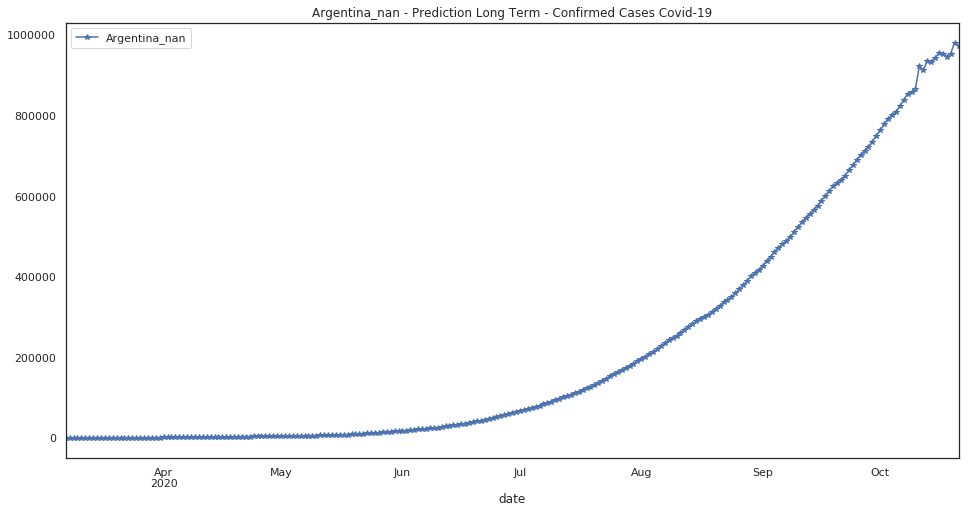

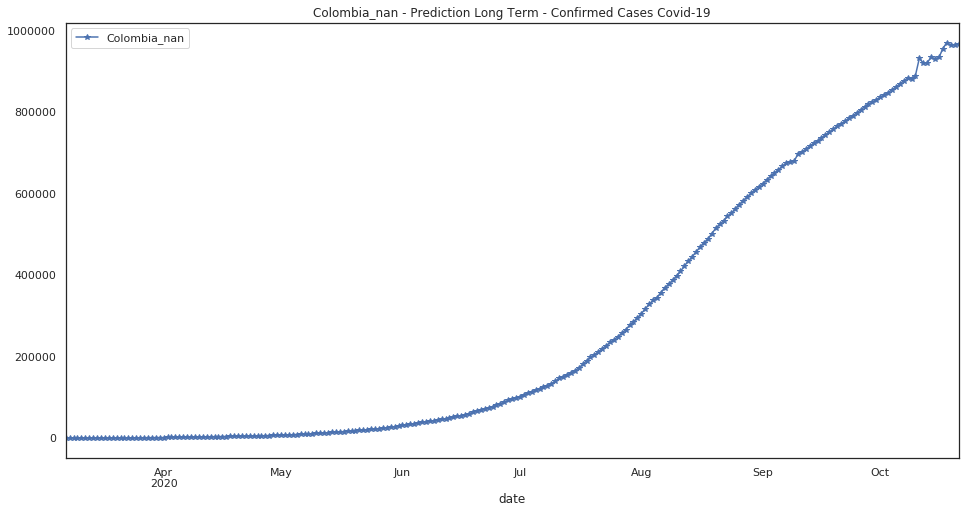

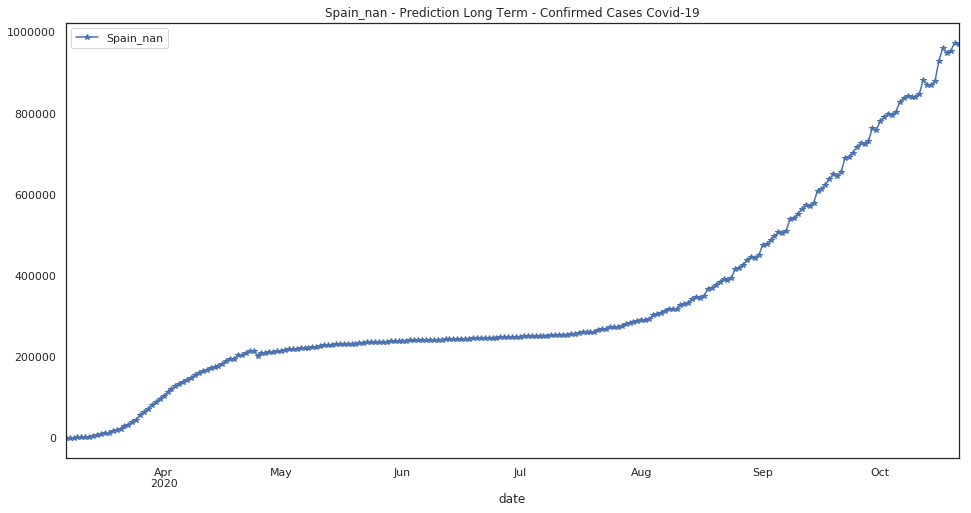

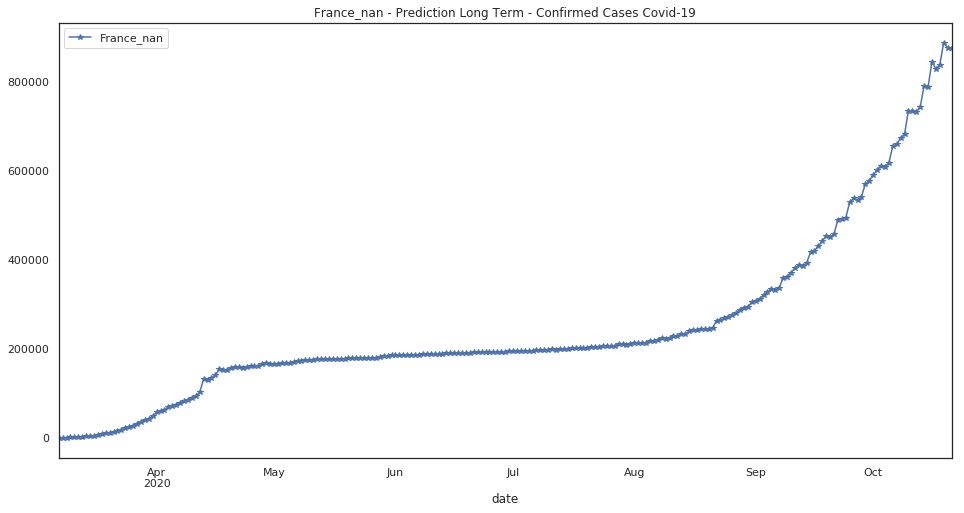

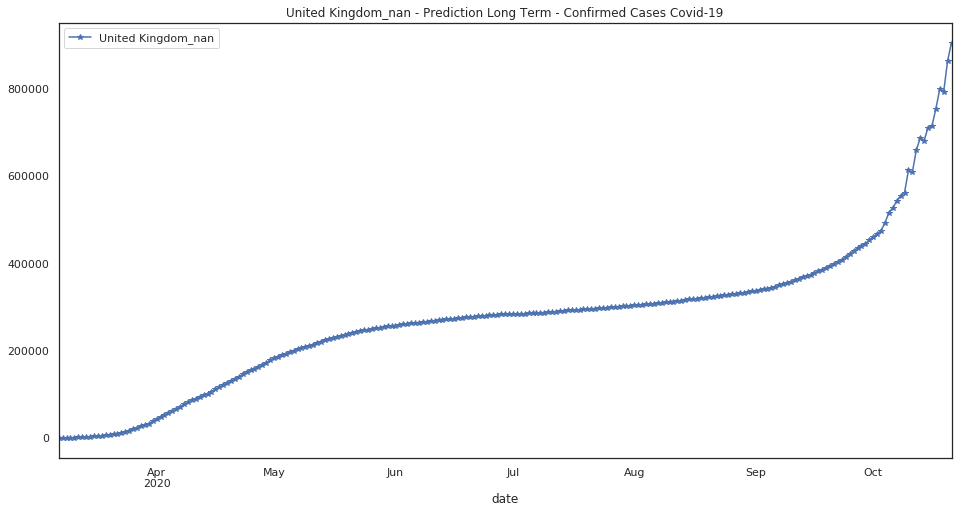

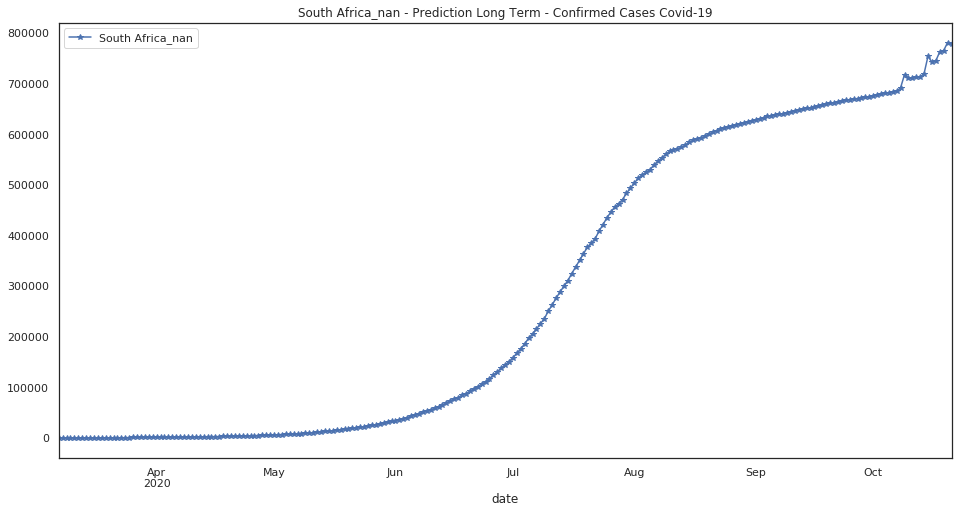

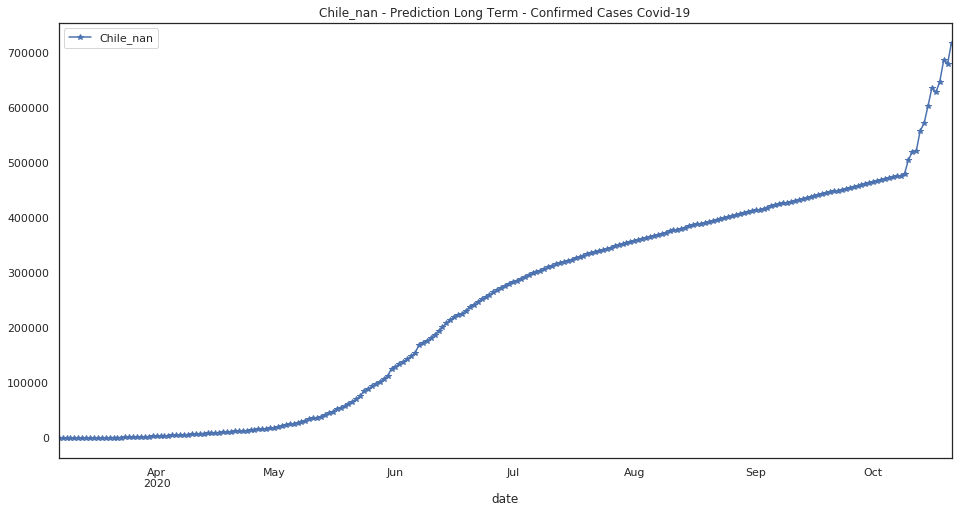

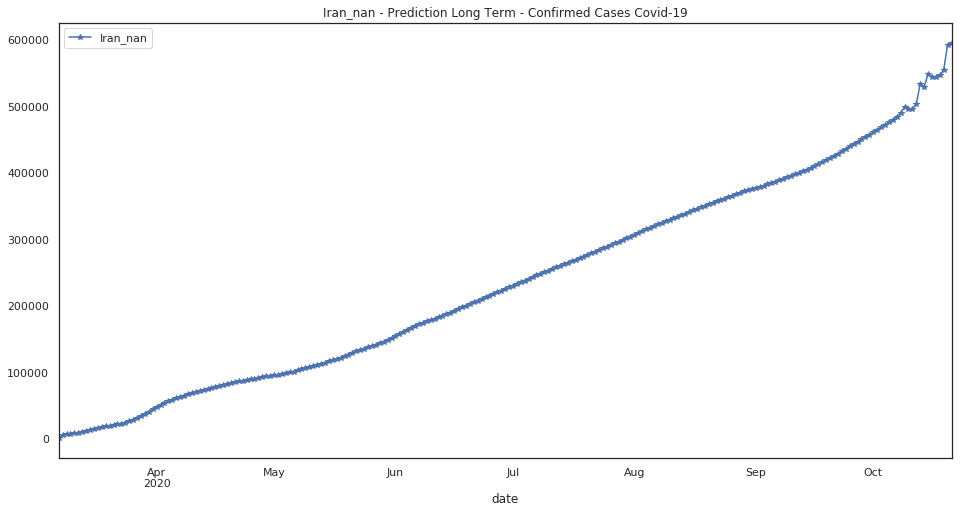

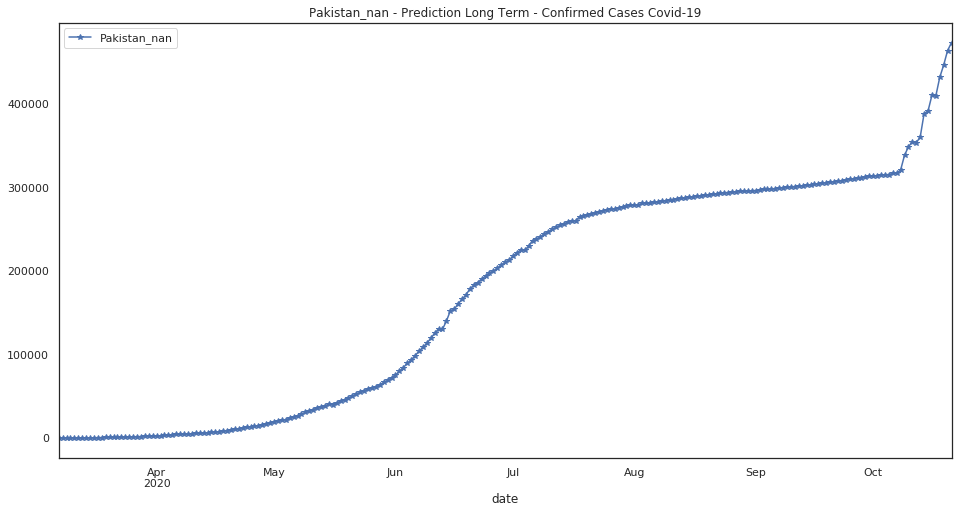

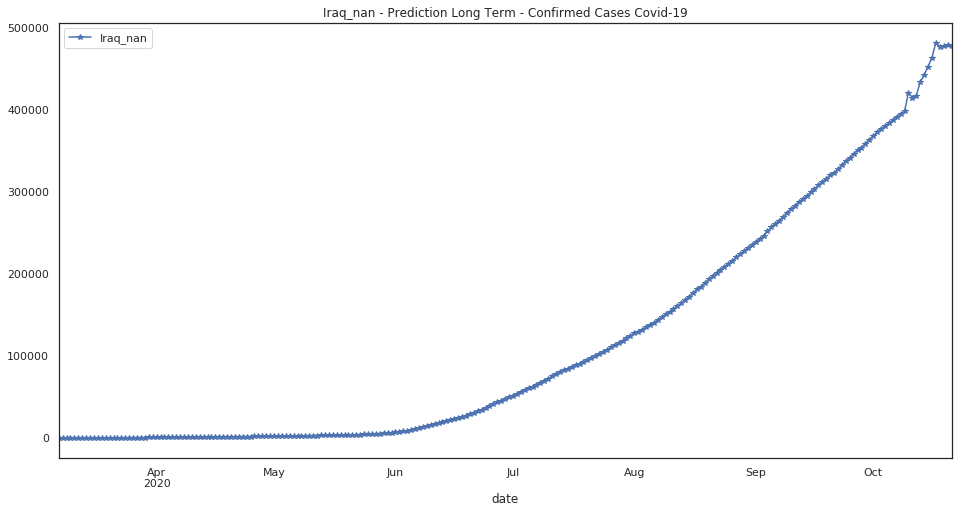

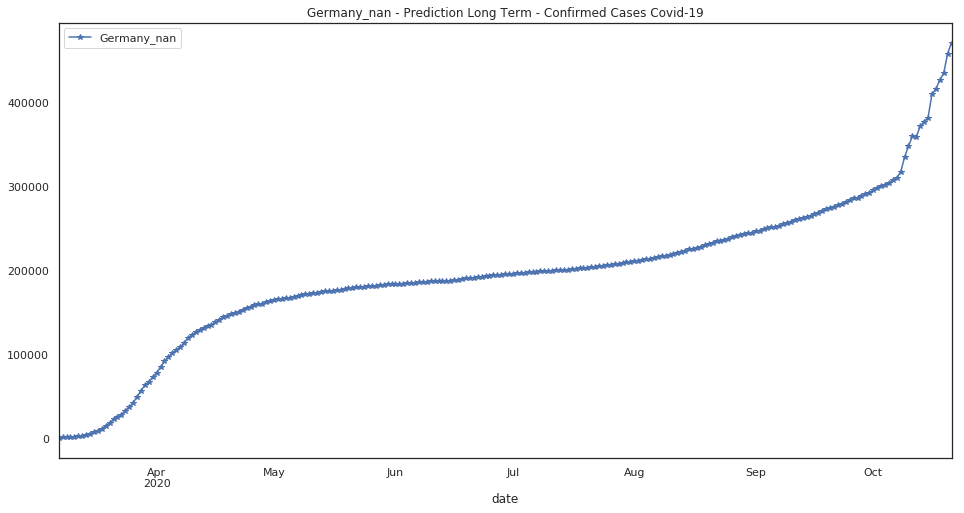

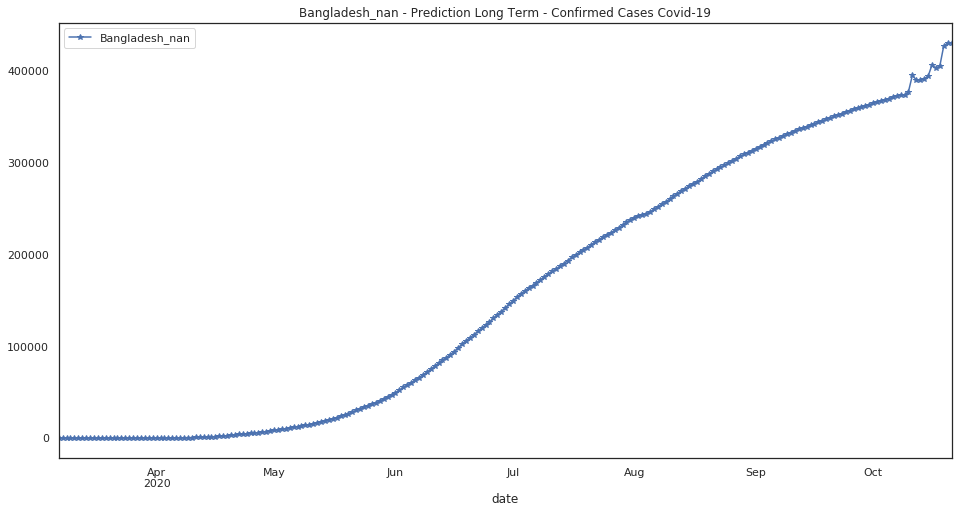

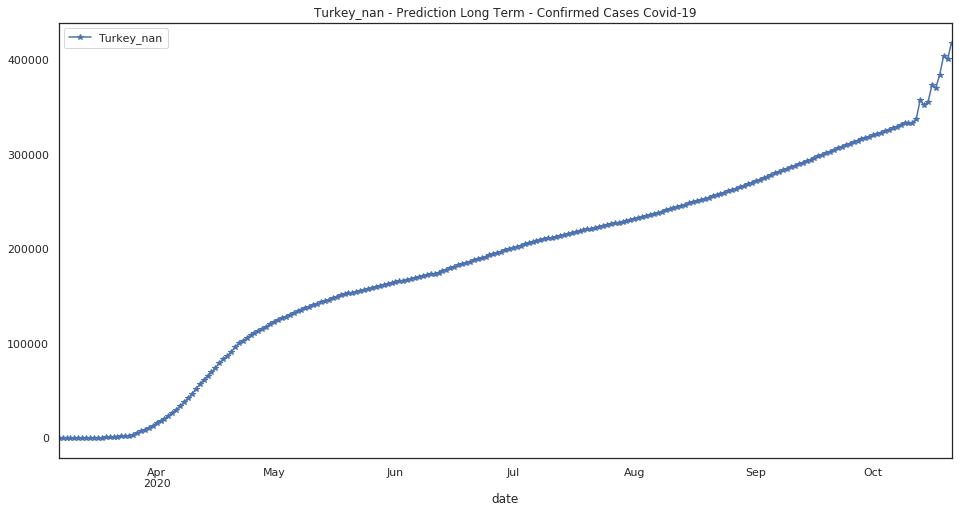

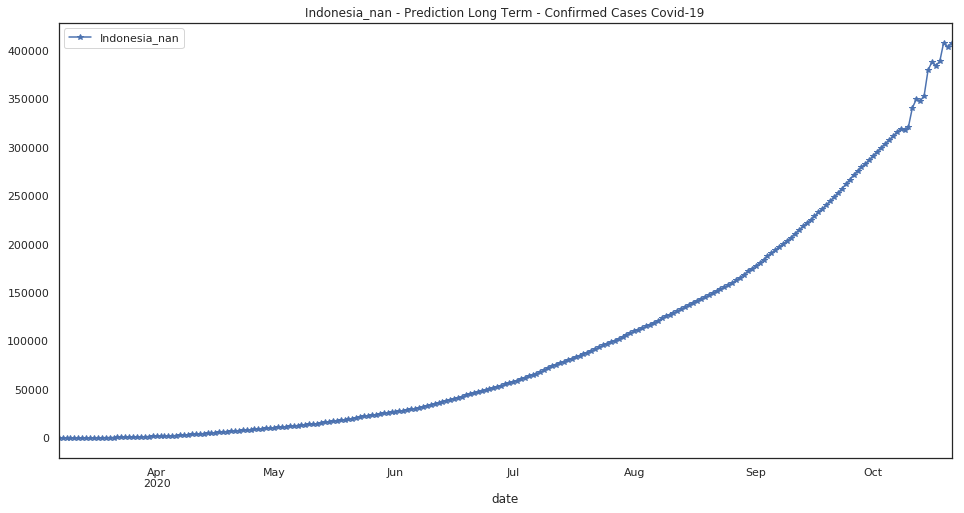

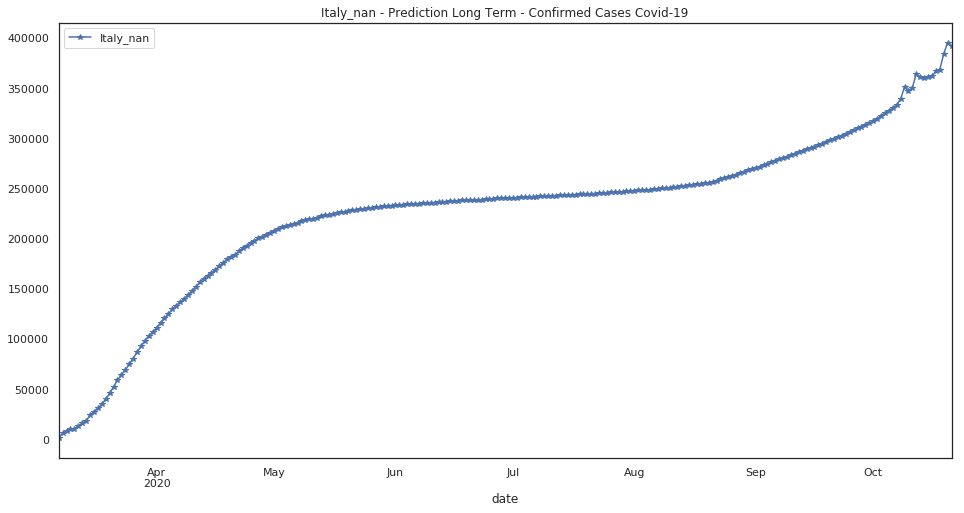

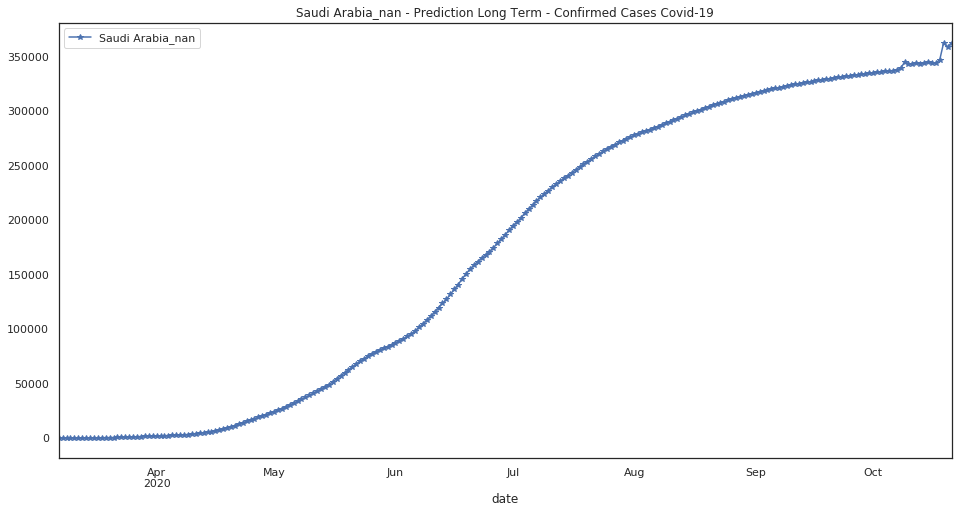

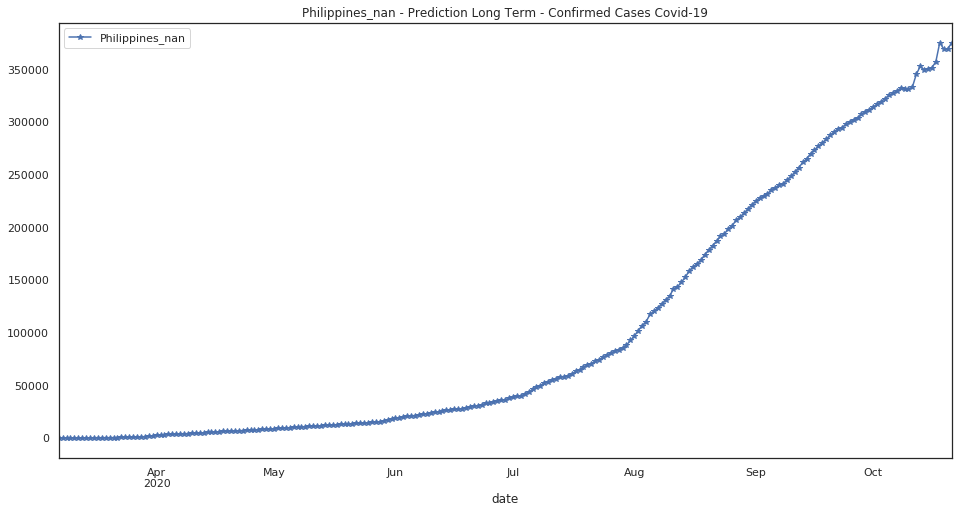

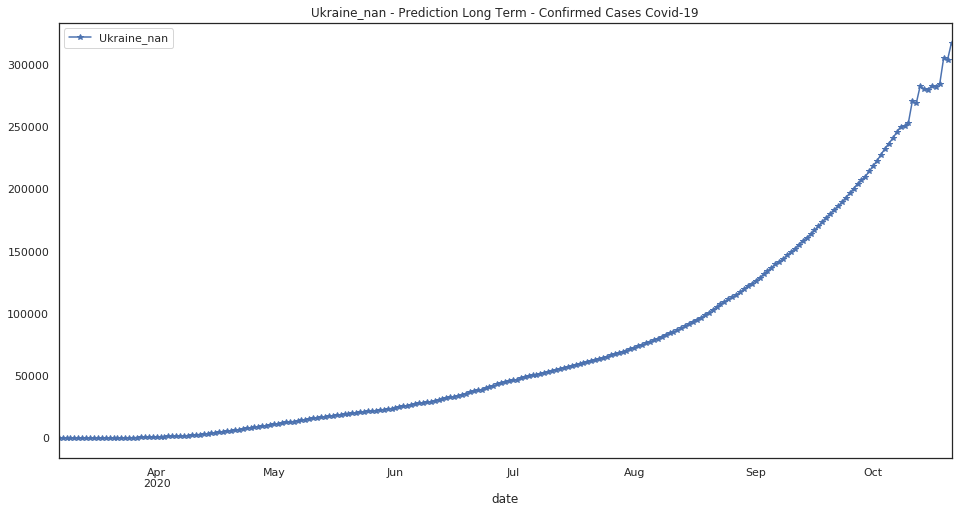

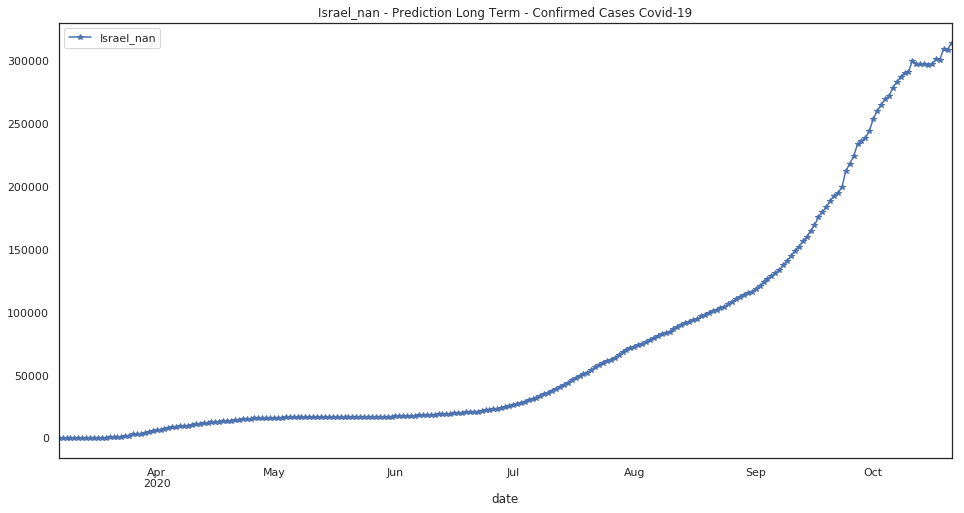

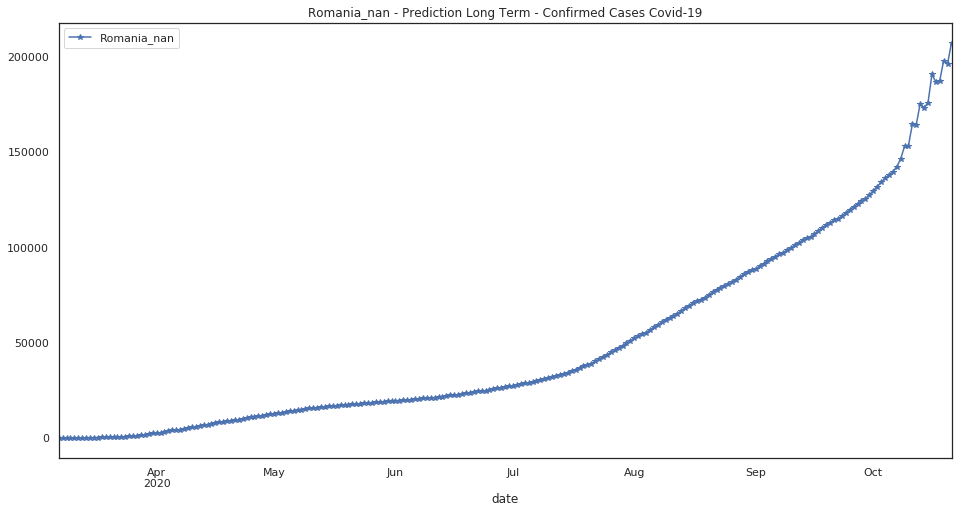

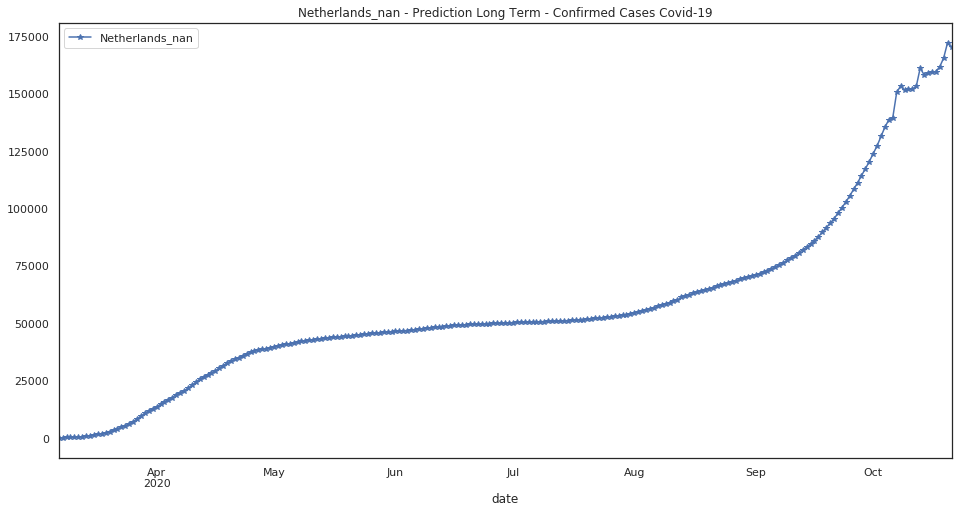

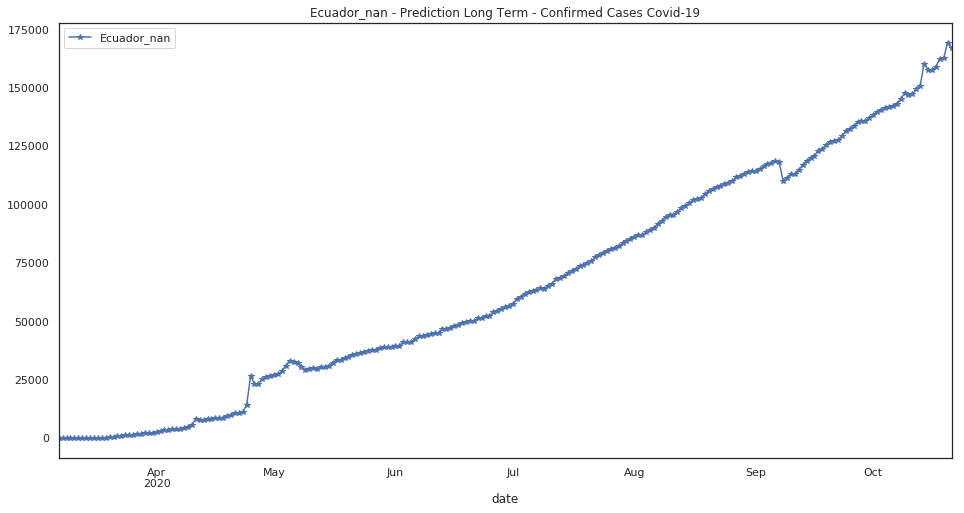

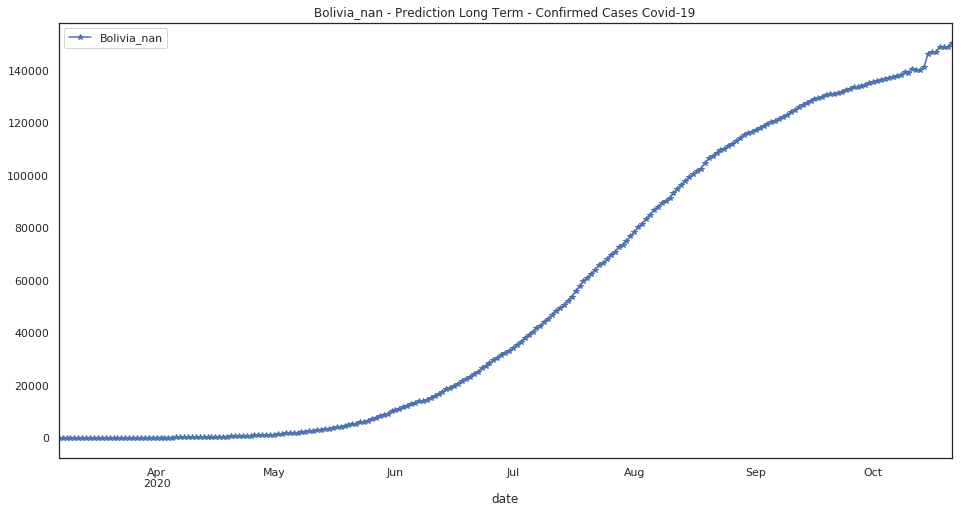

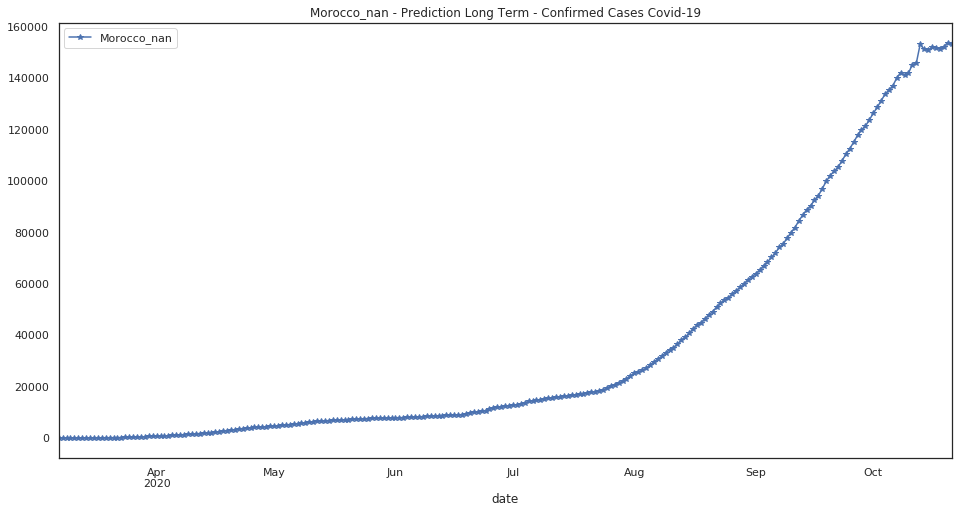

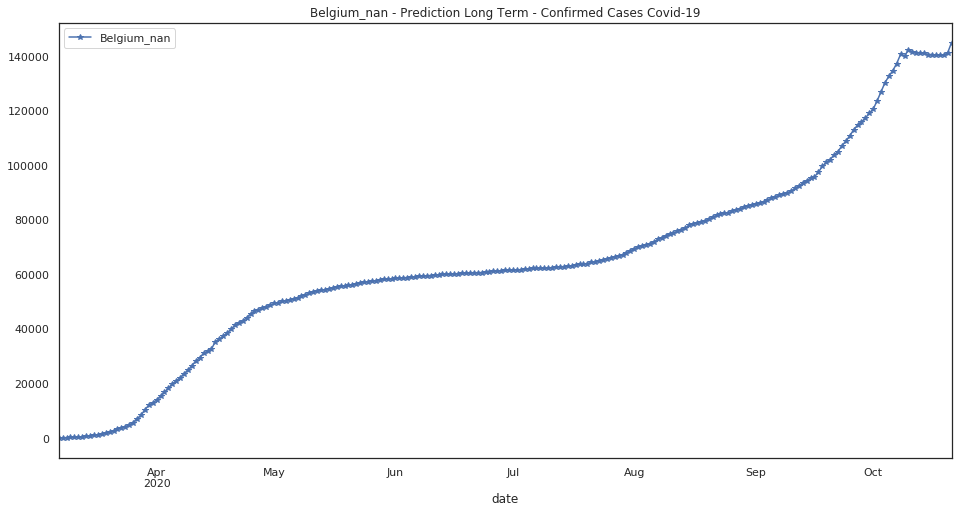

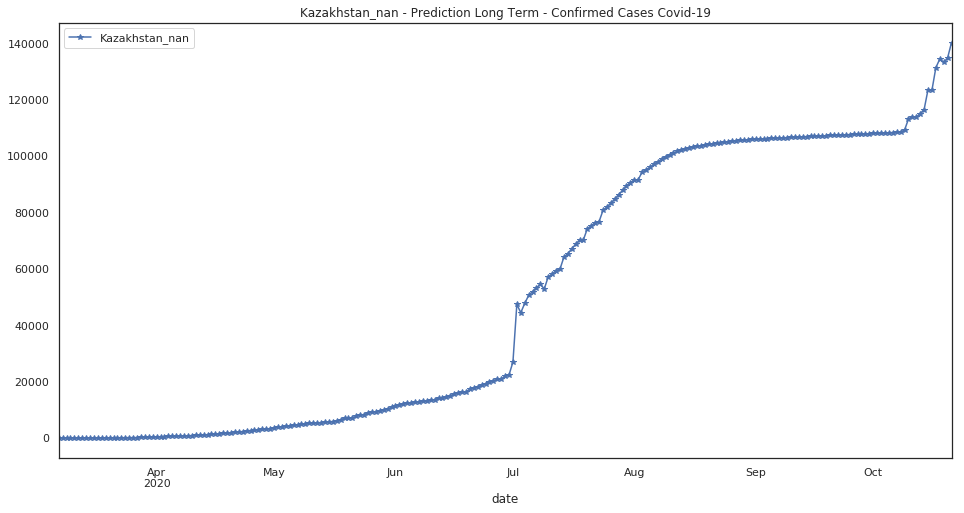

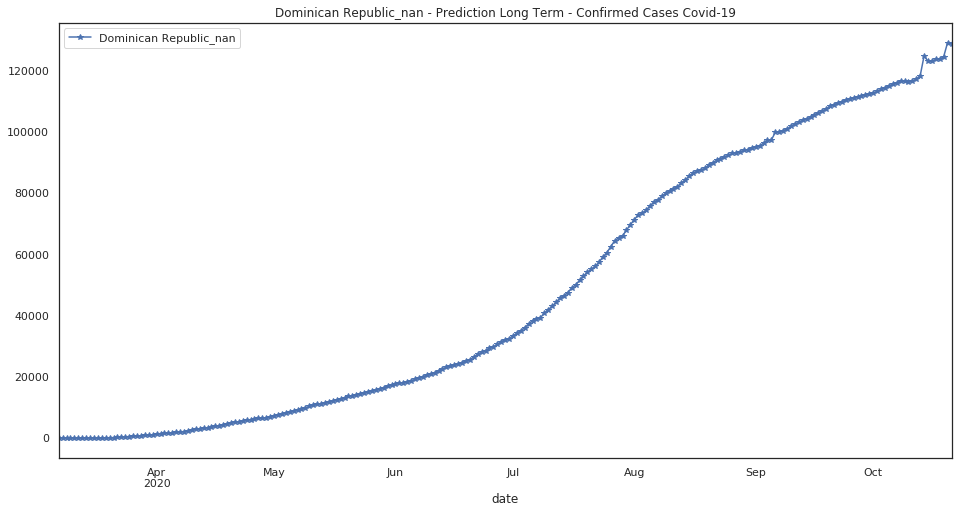

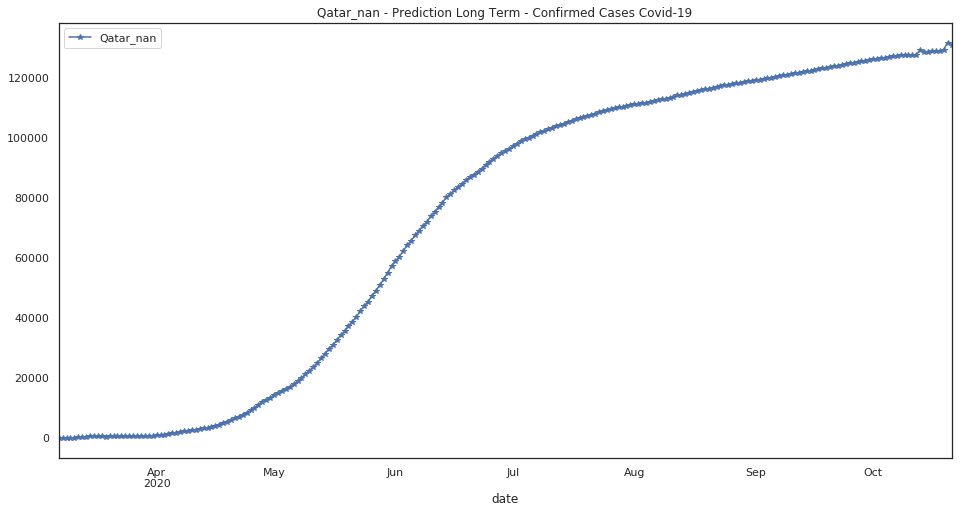

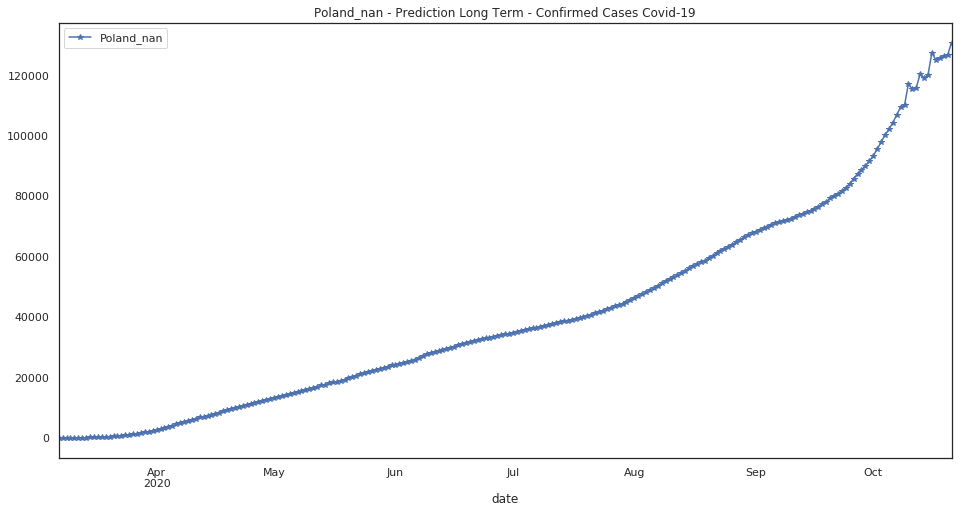

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

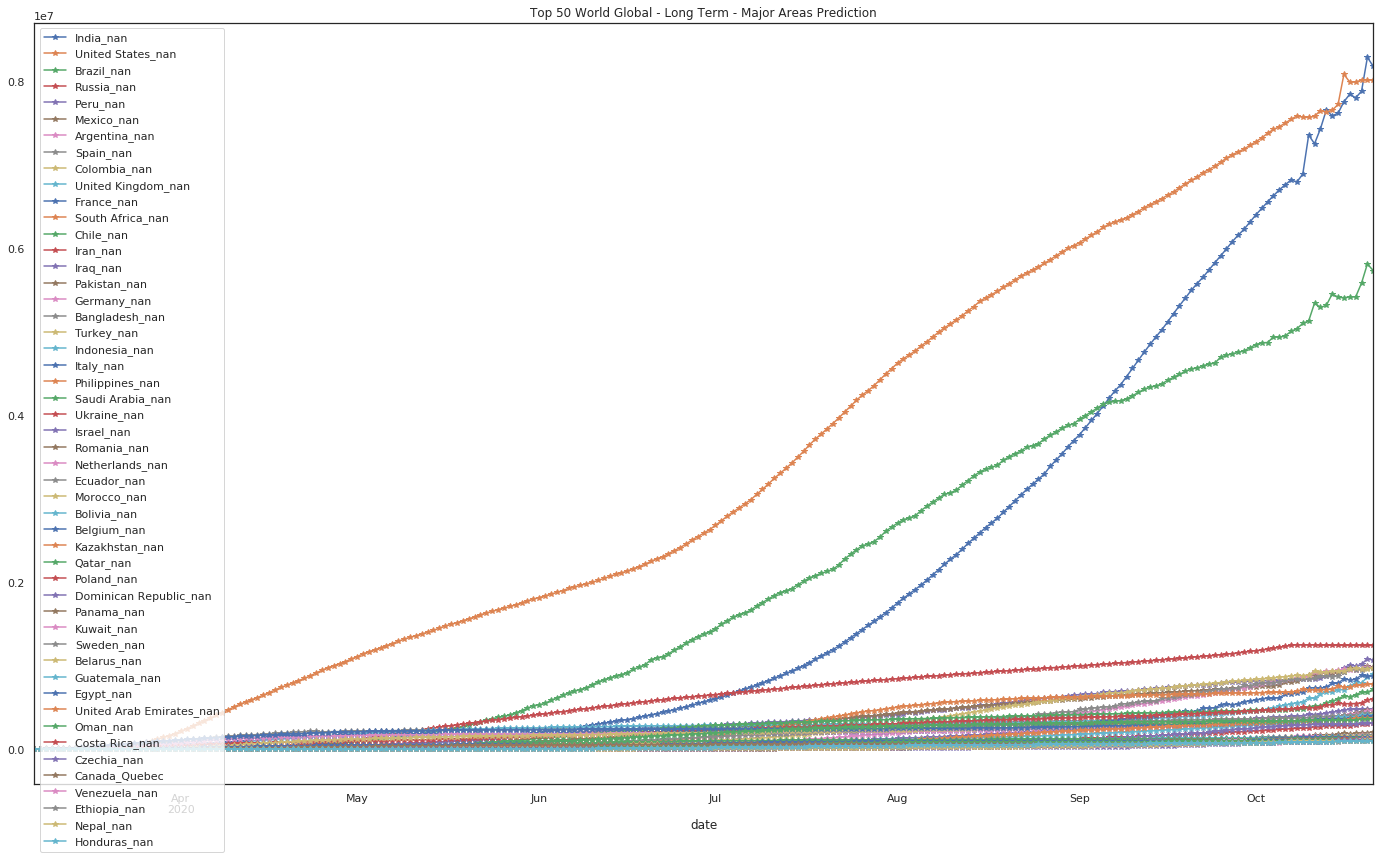

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

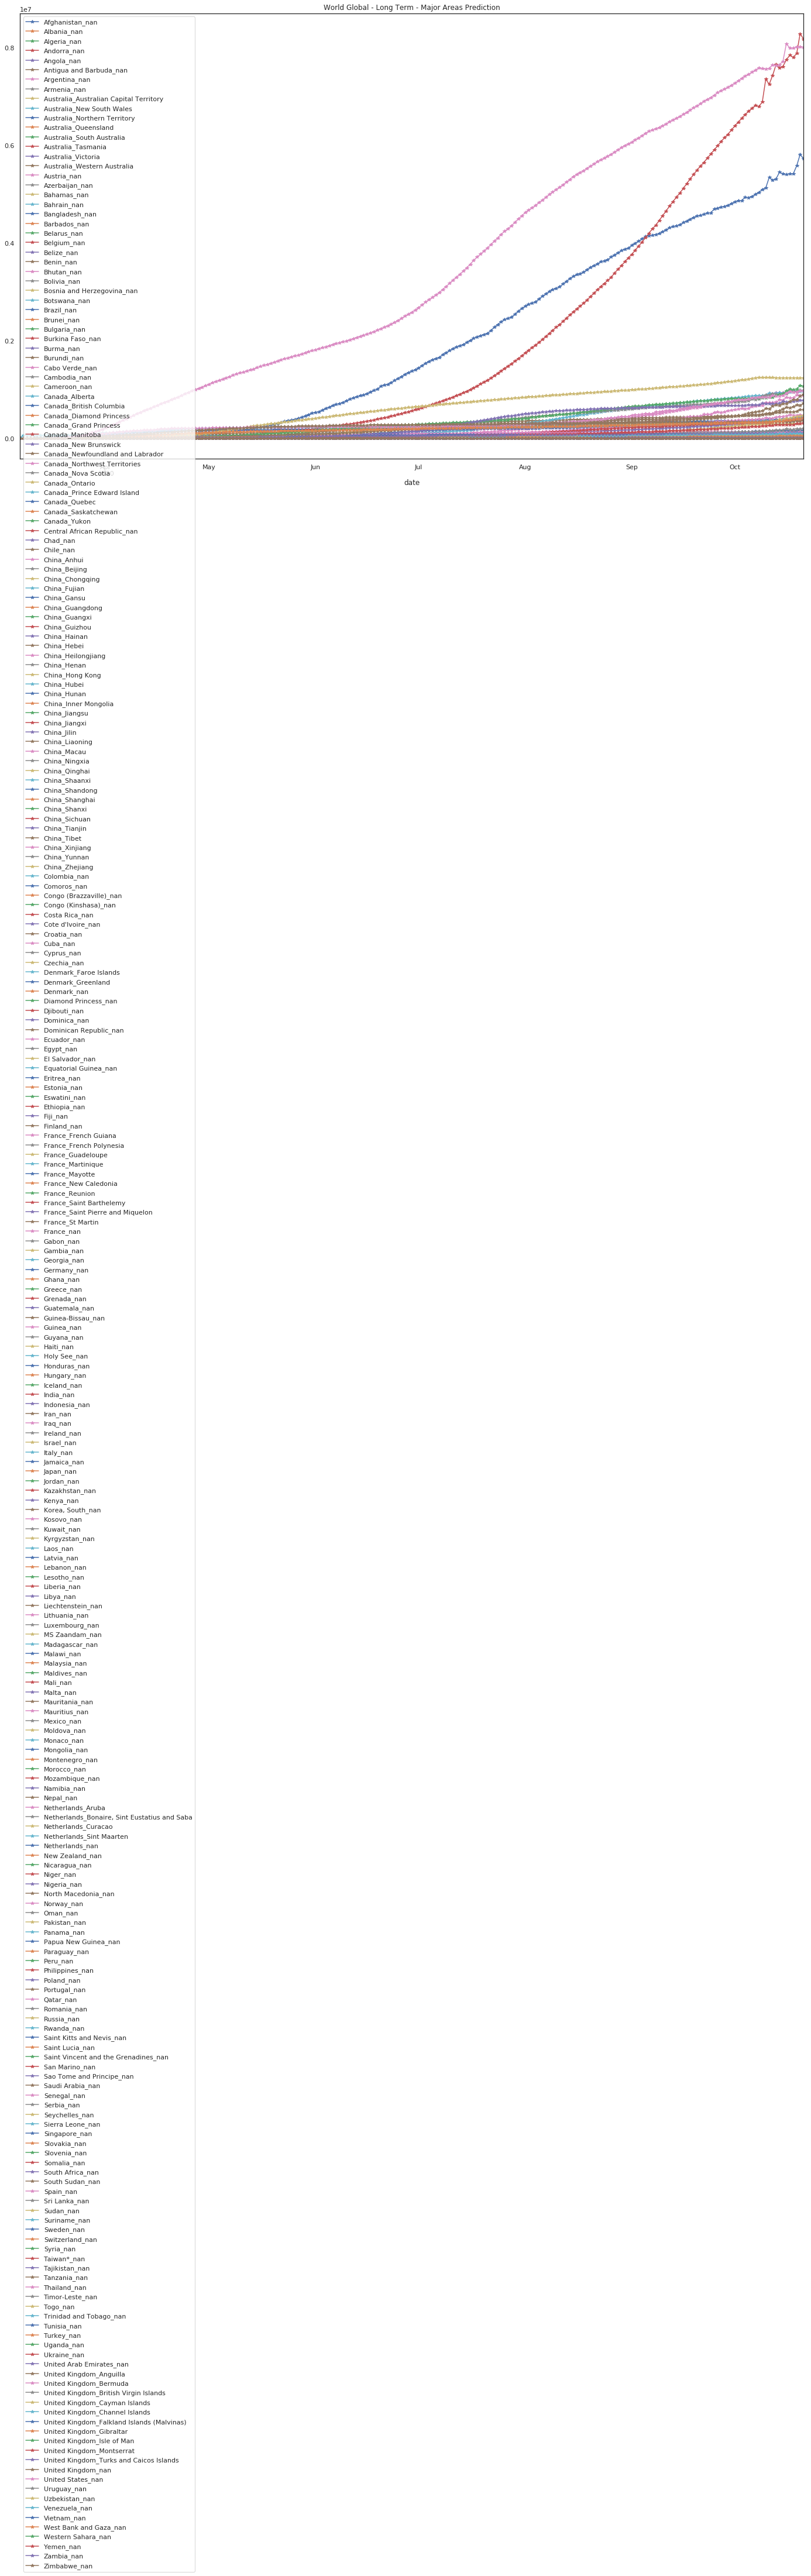

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-21           1148.0        618.0       2915.0        764.0   
2020-04-22           1226.0        644.0       3014.0        764.0   
2020-04-23           1319.0        670.0       3116.0        769.0   
2020-04-24           1419.0        697.0       3216.0        770.0   
2020-04-25           1493.0        713.0       3339.0        777.0   
2020-04-26           1614.0        749.0       3469.0        783.0   
2020-04-27           1698.0        759.0       3598.0        781.0   
2020-04-28           1895.0        768.0       3740.0        787.0   
2020-04-29           2011.0        783.0       3891.0        786.0   
2020-04-30           2146.0        797.0       4105.0        786.0   
2020-05-01           2405.0        799.0       4256.0        788.0   
2020-05-02           2552.0        808.0       4402.0        787.0   
2020-05-03           2702.0        812.0       4558.0        789.0   
2020-05-04           2974.0        817.0       4751.0        790.0   
2020-05-05           3184.0        828.0       4930.0        792.0   
2020-05-06           3522.0        845.0       5121.0        793.0   
2020-05-07           3661.0        854.0       5275.0        793.0   
2020-05-08           3837.0        864.0       5471.0        794.0   
2020-05-09           4091.0        871.0       5665.0        794.0   
2020-05-10           4389.0        879.0       5852.0        796.0   
2020-05-11           4768.0        891.0       6012.0        797.0   
2020-05-12           5033.0        893.0       6185.0        797.0   
2020-05-13           5296.0        895.0       6366.0        801.0   
2020-05-14           5611.0        902.0       6558.0        802.0   
2020-05-15           6083.0        923.0       6746.0        803.0   
2020-05-16           6494.0        941.0       6934.0        803.0   
2020-05-17           6809.0        957.0       7129.0        803.0   
2020-05-18           7082.0        967.0       7329.0        803.0   
2020-05-19           7585.0        968.0       7508.0        803.0   
2020-05-20           8209.0        973.0       7683.0        803.0   
...                     ...          ...          ...          ...   
2020-09-22          39338.0      12699.0      50597.0       1806.0   
2020-09-23          39365.0      12822.0      50785.0       1792.0   
2020-09-24          39427.0      12944.0      50967.0       1866.0   
2020-09-25          39447.0      13082.0      51143.0       1877.0   
2020-09-26          39462.0      13200.0      51313.0       1958.0   
2020-09-27          39475.0      13299.0      51468.0       1943.0   
2020-09-28          39502.0      13406.0      51618.0       1973.0   
2020-09-29          39504.0      13542.0      51764.0       2109.0   
2020-09-30          39529.0      13666.0      51924.0       2094.0   
2020-10-01          39542.0      13803.0      52087.0       2178.0   
2020-10-02          39558.0      13968.0      52246.0       2182.0   
2020-10-03          39563.0      14127.0      52402.0       2238.0   
2020-10-04          39583.0      14280.0      52550.0       2230.0   
2020-10-05          39647.0      14433.0      52692.0       2289.0   
2020-10-06          39739.0      14581.0      52828.0       2566.0   
2020-10-07          39800.0      14747.0      52956.0       2541.0   
2020-10-08          40248.0      14876.0      53049.0       2750.0   
2020-10-09          42120.0      14826.0      53620.0       2722.0   
2020-10-10          41912.0      14903.0      56515.0       2748.0   
2020-10-11          43249.0      15286.0      55750.0       2933.0   
2020-10-12          43068.0      15167.0      55738.0       2944.0   
2020-10-13          43296.0      15149.0      55990.0       3164.0   
2020-10-14          44533.0      15165.0      55979.0       3122.0   
2020-10-15          44234.0      15317.0      56198.0       3124.0   
2020-10-16

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
238                                Thailand_nan  15.870032  100.992541   
239                             Timor-Leste_nan  -8.874217  125.727539   
240                                    Togo_nan   8.619500    0.824800   
241                     Trinidad and Tobago_nan  10.691800  -61.222500   
242                                 Tunisia_nan  33.886917    9.537499   
243                                  Turkey_nan  38.963700   35.243300   
244                           United States_nan  40.000000 -100.000000   
245                                  Uganda_nan   1.373333   32.290275   
246                                 Ukraine_nan  48.379400   31.165600   
247                    United Arab Emirates_nan  23.424076   53.847818   
248                     United Kingdom_Anguilla  18.220600  -63.068600   
249                      United Kingdom_Bermuda  32.307800  -64.750500   
250       United Kingdom_British Virgin Islands  18.420700  -64.640000   
251               United Kingdom_Cayman Islands  19.313300  -81.254600   
252              United Kingdom_Channel Islands  49.372300   -2.364400   
253  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
254                    United Kingdom_Gibraltar  36.140800   -5.353600   
255                  United Kingdom_Isle of Man  54.236100   -4.548100   
256                   United Kingdom_Montserrat  16.742498  -62.187366   
257     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
258                          United Kingdom_nan  55.378100   -3.436000   
259                                 Uruguay_nan -32.522800  -55.765800   
260                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      20            Bangladesh_nan  23.685000   90.356300   
2      22               Belarus_nan  53.709800   27.953400   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      50             Canada_Quebec  52.939900  -73.549100   
7      55                 Chile_nan -35.675100  -71.543000   
8      89              Colombia_nan   4.570900  -74.297300   
9      93            Costa Rica_nan   9.748900  -83.753400   
10     98               Czechia_nan  49.817500   15.473000   
11    105    Dominican Republic_nan  18.735700  -70.162700   
12    106               Ecuador_nan  -1.831200  -78.183400   
13    107                 Egypt_nan  26.820553   30.802498   
14    113              Ethiopia_nan   9.145000   40.489700   
15    126                France_nan  46.227600    2.213700   
16    131               Germany_nan  51.165691   10.451526   
17    135             Guatemala_nan  15.783500  -90.230800   
18    141              Honduras_nan  15.200000  -86.241900   
19    144                 India_nan  20.593684   78.962880   
20    145             Indonesia_nan  -0.789300  113.921300   
21    146                  Iran_nan  32.427908   53.688046   
22    147                  Iraq_nan  33.223191   43.679291   
23    149                Israel_nan  31.046051   34.851612   
24    150                 Italy_nan  41.871940   12.567380   
25    154            Kazakhstan_nan  48.019600   66.923700   
26    158                Kuwait_nan  29.311660   47.481766   
27    179                Mexico_nan  23.634500 -102.552800   
28    184               Morocco_nan  31.791700   -7.092600   
29    187                 Nepal_nan  28.166700   84.250000   
30    192           Netherlands_nan  52.132600    5.291300   
31    199                  Oman_nan  21.512583   55.923255   
32    200              Pakistan_nan  30.375300   69.345100   
33    201                Panama_nan   8.538000  -80.782100   
34    204                  Peru_nan  -9.190000  -75.015200   
35    205           Philippines_nan  12.879721  121.774017   
36    206                Poland_nan  51.919400   19.145100   
37    207              Portugal_nan  39.399900   -8.224500   
38    208                 Qatar_nan  25.354800   51.183900   
39    209               Romania_nan  45.943200   24.966800   
40    210                Russia_nan  61.524010  105.318756   
41    217          Saudi Arabia_nan  23.885942   45.079162   
42    226          South Africa_nan -30.559500   22.937500   
43    228                 Spain_nan  40.463667   -3.749220   
44    232                Sweden_nan  60.128161   18.643501   
45    243                Turkey_nan  38.963700   35.243300   
46    244         United States_nan  40.000000 -100.000000   
47    246               Ukraine_nan  48.379400   31.165600   
48    247  United Arab Emirates_nan  23.424076   53.847818   
49    258        United Kingdom_nan  55.378100   -3.436000   
50    261             Venezuela_nan   6.423800  -66.589700   

    2020-03-07 00:00:00  2020-03-08 00:00:00  2020-03-09 00:00:00  \
0                  44.0                 45.0                 12.0   
1                  42.0                 43.0                 46.0   
2                  43.0                 43.0                  7.0   
3                 100.0                169.0                231.0   
4                  42.0                 42.0                 42.0   
5                 111.0                107.0                 62.0   
6                  43.0                 43.0                  4.0   
7                  45.0                 46.0                 20.0   
8                  42.0                 42.0                  2.0   
9                  42.0                 43.0                  5.0   
10                 4

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()